## **IMPORTS AND PATHS**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

stock_path = r"C:\Users\elifr\OneDrive\Desktop\PROJECTS\Proje101\stock.csv"
low_path = r"C:\Users\elifr\OneDrive\Desktop\PROJECTS\Proje443\low_prices.csv"
open_path = r"C:\Users\elifr\OneDrive\Desktop\PROJECTS\Proje443\open_prices.csv"

save_folder = "labelled_data"
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
    print(f"Created folder: {save_folder}")

## **GET LOW PRICES**

In [43]:
data = pd.read_csv(stock_path)

# Keep the first column 
first_column = data.iloc[:, 0]  # Preserve the first column (Ticker)

# Filter columns containing "Low" only (excluding the first column)
low = data.filter(like="Low", axis=1)

# Take the first row values (row with index 0) for renaming
new_column_names = low.iloc[0].values
low.columns = new_column_names

# Drop the first two rows (stock names & date row)
low = low.drop([0, 1]).reset_index(drop=True)

# Add the first column (Ticker) back
low.insert(0, "Date", first_column.iloc[2:].values)

low.to_csv(low_path, index=False)
low = pd.read_csv(low_path)

display(low.head())


Date        AAPL        MSFT       NVDA      GOOGL         JNJ  \
0  2023-02-21  146.928265  248.147772  20.603012  91.388711  149.605701   
1  2023-02-22  145.690736  246.914888  20.406158  90.282718  149.112989   
2  2023-02-23  145.769948  247.052973  23.008262  89.435791  148.449736   
3  2023-02-24  144.265133  244.705524  22.930323  88.260051  147.066335   
4  2023-02-27  145.977852  245.977881  23.436952  89.017303  146.943165   

         PFE         UNH        MRNA         JPM  ...          BA         HON  \
0  38.143687  475.775780  159.490005  131.882363  ...  205.050003  188.187324   
1  37.866239  474.000775  157.000000  130.637208  ...  204.649994  186.434267   
2  37.785696  471.284816  143.718994  131.112454  ...  205.759995  185.457235   
3  37.150264  468.510663  138.210007  132.053461  ...  197.360001  183.800830   
4  36.452181  467.492211  136.720001  134.705372  ...  199.059998  184.648284   

         DUK         SO         AMT         SPG          O        FCX  \
0  89.901056  61.192771  190.149357  107.287724  58.212503  41.227831   
1  89.504973  60.883804  185.753174  107.573666  58.588628  40.323329   
2  88.795717  60.293974  187.072022  108.100908  58.821494  38.845003   
3  87.957506  59.647963  181.534680  107.493251  57.908003  37.940497   
4  88.141729  60.116086  180.487103  109.012404  57.728883  38.718567   

         DOW         LIN  
0  50.984381  313.906304  
1  50.984378  316.751769  
2  50.651671  318.077094  
3  50.408885  314.374033  
4  51.700530  335.412910  

[5 rows x 37 columns]

## **GET OPEN PRICES**

In [44]:
data = pd.read_csv(stock_path)

# Keep the first column 
first_column = data.iloc[:, 0]  # Preserve the first column (Ticker)

# Filter columns containing "Low" only (excluding the first column)
open = data.filter(like="Open", axis=1)

# Take the first row values (row with index 0) for renaming
new_column_names = open.iloc[0].values
open.columns = new_column_names

# Drop the first two rows (stock names & date row)
open = open.drop([0, 1]).reset_index(drop=True)

# Add the first column (Ticker) back
open.insert(0, "Date", first_column.iloc[2:].values)

open.to_csv(open_path, index=False)
open = pd.read_csv(open_path)

display(open.head())


Date        AAPL        MSFT       NVDA      GOOGL         JNJ  \
0  2023-02-21  148.700387  250.998231  20.984735  92.664087  151.273351   
1  2023-02-22  147.383654  250.613581  20.691952  91.368777  150.183704   
2  2023-02-23  148.591484  252.063471  23.422961  91.587985  149.435177   
3  2023-02-24  145.641255  246.540077  23.208121  89.116945  148.430768   
4  2023-02-27  146.235266  249.005885  23.652795  89.545395  148.241278   

         PFE         UNH        MRNA         JPM  ...          BA         HON  \
0  38.313734  481.789675  165.250000  133.726342  ...  208.990005  193.091987   
1  38.233177  478.016482  160.350006  132.043949  ...  205.309998  188.790806   
2  37.848344  472.051110  153.729996  131.863345  ...  207.449997  188.789255   
3  37.615650  474.883417  140.529999  132.224559  ...  200.000000  186.718761   
4  37.087610  474.097782  139.520004  135.076068  ...  199.869995  187.229154   

         DUK         SO         AMT         SPG          O        FCX  \
0  91.181408  61.848137  195.172251  109.217941  58.884185  41.315364   
1  89.772098  61.305117  191.823667  108.351116  58.955818  40.877701   
2  90.149761  60.977427  188.241223  109.271545  59.152859  40.585929   
3  88.270689  60.078634  185.940218  107.725594  58.857313  38.280903   
4  89.366810  60.631022  185.734474  110.290277  58.794621  39.039518   

         DOW         LIN  
0  51.883576  314.695623  
1  51.056312  319.490030  
2  51.622800  323.261287  
3  50.678643  314.841790  
4  52.228460  337.410563  

[5 rows x 37 columns]

## **CREATE MINI DATAFRAMES FROM LOW DATA**

In [45]:
stock_columns = [col for col in low.columns if col != 'Date']

# Create a dictionary to store the separate dataframes
stock_dataframes = {}

# Loop through each stock column and create a separate dataframe
for stock in stock_columns:
    # Create a new dataframe with just Date and the current stock
    stock_dataframes[stock] = low[['Date', stock]]
    stock_dataframes[stock].columns = stock_dataframes[stock].columns[:1].tolist() + ['Low'] + stock_dataframes[stock].columns[2:].tolist()

# Print the resulting dataframes
for stock, stock_df in stock_dataframes.items():
    print(f"\n{stock} dataframe:")
    print(stock_df)


AAPL dataframe:
           Date         Low
0    2023-02-21  146.928265
1    2023-02-22  145.690736
2    2023-02-23  145.769948
3    2023-02-24  144.265133
4    2023-02-27  145.977852
..          ...         ...
494  2025-02-10  227.199997
495  2025-02-11  228.130005
496  2025-02-12  230.679993
497  2025-02-13  235.570007
498  2025-02-14  240.990005

[499 rows x 2 columns]

MSFT dataframe:
           Date         Low
0    2023-02-21  248.147772
1    2023-02-22  246.914888
2    2023-02-23  247.052973
3    2023-02-24  244.705524
4    2023-02-27  245.977881
..          ...         ...
494  2025-02-10  410.920013
495  2025-02-11  409.299988
496  2025-02-12  404.369995
497  2025-02-13  406.359985
498  2025-02-14  405.880005

[499 rows x 2 columns]

NVDA dataframe:
           Date         Low
0    2023-02-21   20.603012
1    2023-02-22   20.406158
2    2023-02-23   23.008262
3    2023-02-24   22.930323
4    2023-02-27   23.436952
..          ...         ...
494  2025-02-10  129.960007
495  

## **CREATE MINI DATAFRAMES FROM OPEN DATA**

In [46]:
open_columns = [col for col in open.columns if col != 'Date']

# Create a dictionary to store the separate dataframes
open_dataframes = {}

# Loop through each stock column and create a separate dataframe
for stock in open_columns:
    # Create a new dataframe with just Date and the current stock
    open_dataframes[stock] = open[['Date', stock]]
    open_dataframes[stock].columns = open_dataframes[stock].columns[:1].tolist() + ['Open'] + open_dataframes[stock].columns[2:].tolist()

    
# Print the resulting dataframes
for stock, stock_df in open_dataframes.items():
    print(f"\n{stock} dataframe:")
    print(stock_df)


AAPL dataframe:
           Date        Open
0    2023-02-21  148.700387
1    2023-02-22  147.383654
2    2023-02-23  148.591484
3    2023-02-24  145.641255
4    2023-02-27  146.235266
..          ...         ...
494  2025-02-10  229.570007
495  2025-02-11  228.199997
496  2025-02-12  231.199997
497  2025-02-13  236.910004
498  2025-02-14  241.250000

[499 rows x 2 columns]

MSFT dataframe:
           Date        Open
0    2023-02-21  250.998231
1    2023-02-22  250.613581
2    2023-02-23  252.063471
3    2023-02-24  246.540077
4    2023-02-27  249.005885
..          ...         ...
494  2025-02-10  413.709991
495  2025-02-11  409.640015
496  2025-02-12  407.209991
497  2025-02-13  407.000000
498  2025-02-14  407.790009

[499 rows x 2 columns]

NVDA dataframe:
           Date        Open
0    2023-02-21   20.984735
1    2023-02-22   20.691952
2    2023-02-23   23.422961
3    2023-02-24   23.208121
4    2023-02-27   23.652795
..          ...         ...
494  2025-02-10  130.089996
495  

## **MERGE MINI DATAFRAMES**

In [47]:
merged_dataframes = {}

# Iterate over the keys of stock_dataframes
for key in stock_dataframes.keys():
    if key in open_dataframes:  # Ensure the key exists in both dictionaries
        merged_dataframes[key] = pd.merge(
            stock_dataframes[key], open_dataframes[key], on="Date", how="inner"
        )

for stock, stock_df in merged_dataframes.items():
    stock_df['Date'] = pd.to_datetime(stock_df['Date'])
    
    print(f"\n{stock} dataframe:")
    print(stock_df)



AAPL dataframe:
          Date         Low        Open
0   2023-02-21  146.928265  148.700387
1   2023-02-22  145.690736  147.383654
2   2023-02-23  145.769948  148.591484
3   2023-02-24  144.265133  145.641255
4   2023-02-27  145.977852  146.235266
..         ...         ...         ...
494 2025-02-10  227.199997  229.570007
495 2025-02-11  228.130005  228.199997
496 2025-02-12  230.679993  231.199997
497 2025-02-13  235.570007  236.910004
498 2025-02-14  240.990005  241.250000

[499 rows x 3 columns]

MSFT dataframe:
          Date         Low        Open
0   2023-02-21  248.147772  250.998231
1   2023-02-22  246.914888  250.613581
2   2023-02-23  247.052973  252.063471
3   2023-02-24  244.705524  246.540077
4   2023-02-27  245.977881  249.005885
..         ...         ...         ...
494 2025-02-10  410.920013  413.709991
495 2025-02-11  409.299988  409.640015
496 2025-02-12  404.369995  407.209991
497 2025-02-13  406.359985  407.000000
498 2025-02-14  405.880005  407.790009

[499 

# **ADD LABEL USING A CONSTANT THRESHOLD**

In [48]:
def add_label(stock_dict):

    enhanced_dict = {}
    
    for stock_name, df in stock_dict.items():
        # Create a copy to avoid modifying the original
        enhanced_df = df.copy()
        
        # Ensure Date is in datetime format
        enhanced_df['Date'] = pd.to_datetime(enhanced_df['Date'])
        
        # Sort by date (important for time series features)
        enhanced_df.sort_values('Date', inplace=True)
        
        # --- Calculate the label ---
        # The label is 1 if the Low price decreases by more than 10% in the future
        
        # Calculate the future low price (shift backward)
        # We'll look 1 day ahead for the prediction
        enhanced_df['Future_Low'] = enhanced_df['Low'].shift(-1)
        
        # Calculate percentage change from current Low to future Low
        enhanced_df['Pct_Change'] = ((enhanced_df['Future_Low'] - enhanced_df['Low']) / enhanced_df['Low']) * 100
        
        # Create label: 1 if decrease is more than 10%, 0 otherwise
        enhanced_df['Label'] = (enhanced_df['Pct_Change'] <= -5).astype(int)
        
        # Drop temporary columns used for calculation
        enhanced_df.drop(['Future_Low', 'Pct_Change'], axis=1, inplace=True)
        
        # Handle NaN values from rolling calculations - using recommended methods
        enhanced_df = enhanced_df.bfill()  # Backfill NaNs
        enhanced_df = enhanced_df.ffill()  # Forward fill any remaining NaNs
        
        # Store in result dictionary
        enhanced_dict[stock_name] = enhanced_df
    
    return enhanced_dict

labelled_stocks = add_label(merged_dataframes)

# **ADD EXTRA FEATURES**

In [49]:
def enhance_stock_dataframes(stock_dict):
    """
    Enhances stock dataframes with rolling statistics and labels for prediction.
    Focuses only on 5-day and 10-day windows, removing 20-day measurements.
    
    Args:
        stock_dict: Dictionary where keys are stock names and values are dataframes
                   Each dataframe has Date, Low, Open columns
    
    Returns:
        Dictionary with enhanced dataframes including features and labels
    """
    enhanced_dict = {}
    
    for stock_name, df in stock_dict.items():
        # Create a copy to avoid modifying the original
        enhanced_df = df.copy()
        
        # Ensure Date is in datetime format
        enhanced_df['Date'] = pd.to_datetime(enhanced_df['Date'])
        
        # Sort by date (important for time series features)
        enhanced_df.sort_values('Date', inplace=True)
        
        # --- Add representative features ---
        
        # Add rolling statistics (5, 10 day windows only)
        windows = [5, 10]  # Removed 20-day window
        
        for window in windows:
            # Rolling mean for Low only
            enhanced_df[f'Low_MA_{window}d'] = enhanced_df['Low'].rolling(window=window).mean()
            
            # Rolling standard deviation (volatility) for Low only
            enhanced_df[f'Low_STD_{window}d'] = enhanced_df['Low'].rolling(window=window).std()
            
            # Rolling min/max for Low only
            enhanced_df[f'Low_Min_{window}d'] = enhanced_df['Low'].rolling(window=window).min()
            enhanced_df[f'Low_Max_{window}d'] = enhanced_df['Low'].rolling(window=window).max()
            
            # Distance from moving average (percentage) for Low only
            enhanced_df[f'Low_Dist_MA_{window}d'] = (enhanced_df['Low'] / enhanced_df[f'Low_MA_{window}d'] - 1) * 100
            
            # Price momentum (percentage change) for Low only
            enhanced_df[f'Low_Momentum_{window}d'] = enhanced_df['Low'].pct_change(periods=window) * 100
        
        # Volatility ratio - keeping only the 5_10 ratio (removing 5_20)
        enhanced_df['Volatility_Ratio_5_10'] = enhanced_df['Low_STD_5d'] / enhanced_df['Low_STD_10d']
        
        # Moving average crossovers - keep only 5_above_10 (removing 20-day related)
        enhanced_df['MA_5_above_10'] = (enhanced_df['Low_MA_5d'] > enhanced_df['Low_MA_10d']).astype(int)
        
        
        # Handle NaN values from rolling calculations - using recommended methods
        enhanced_df = enhanced_df.bfill()  # Backfill NaNs
        enhanced_df = enhanced_df.ffill()  # Forward fill any remaining NaNs
        
        # Store in result dictionary
        enhanced_dict[stock_name] = enhanced_df
    
    return enhanced_dict

enhanced_stocks = enhance_stock_dataframes(labelled_stocks)

## **VISUALIZE**

In [50]:
from sklearn.preprocessing import MinMaxScaler


Visualization for AAPL

First 5 rows of the dataframe:
        Date         Low        Open  Label   Low_MA_5d  Low_STD_5d  Low_Min_5d  Low_Max_5d  Low_Dist_MA_5d  Low_Momentum_5d  Low_MA_10d  Low_STD_10d  Low_Min_10d  Low_Max_10d  Low_Dist_MA_10d  Low_Momentum_10d  Volatility_Ratio_5_10  MA_5_above_10
0 2023-02-21  146.928265  148.700387      0  145.726387    0.954748  144.265133  146.928265         0.17256        -1.064621  145.780837     2.528844   142.463275   151.927873         4.216628          1.832756                1.45131              0
1 2023-02-22  145.690736  147.383654      0  145.726387    0.954748  144.265133  146.928265         0.17256        -1.064621  145.780837     2.528844   142.463275   151.927873         4.216628          1.832756                1.45131              0
2 2023-02-23  145.769948  148.591484      0  145.726387    0.954748  144.265133  146.928265         0.17256        -1.064621  145.780837     2.528844   142.463275   151.927873         4.216628      

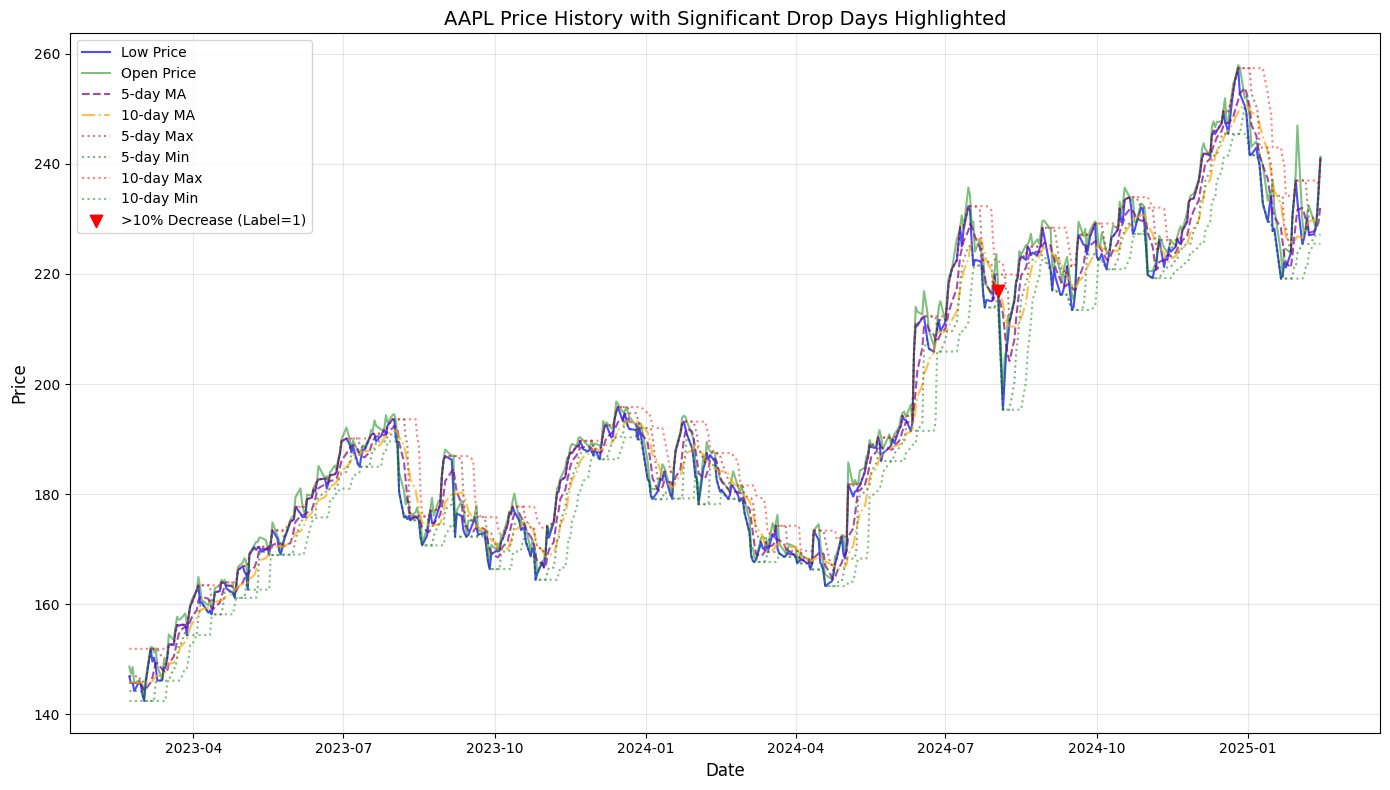

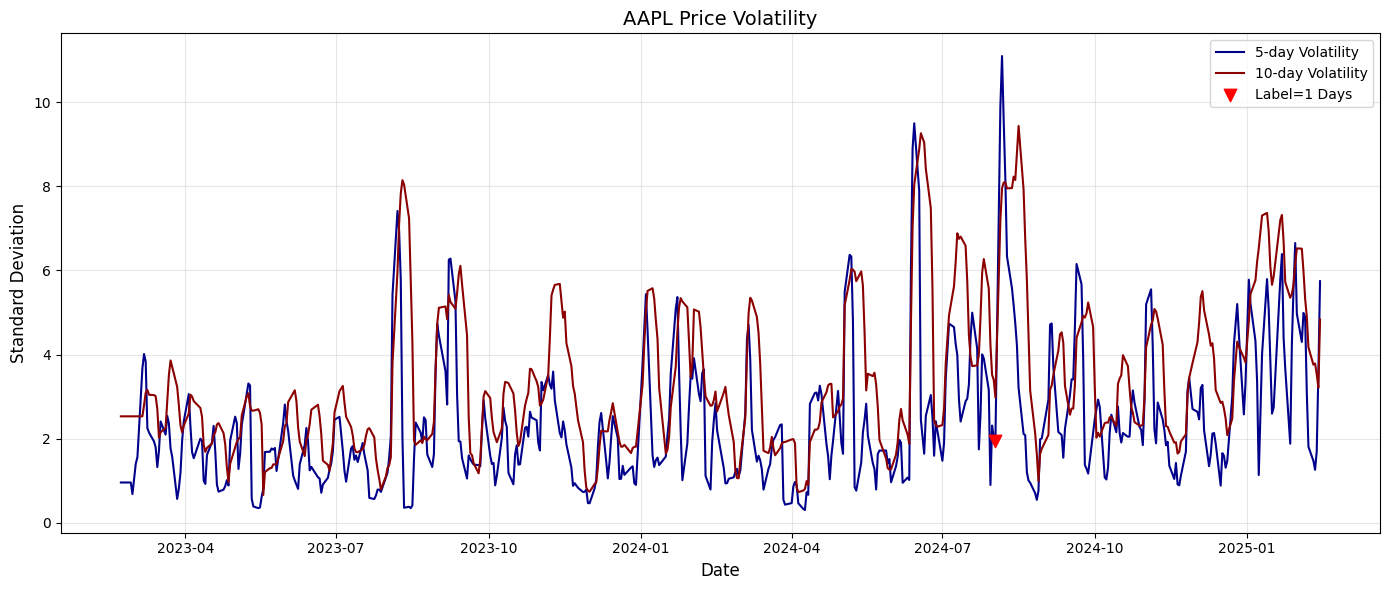

<Figure size 1400x700 with 0 Axes>

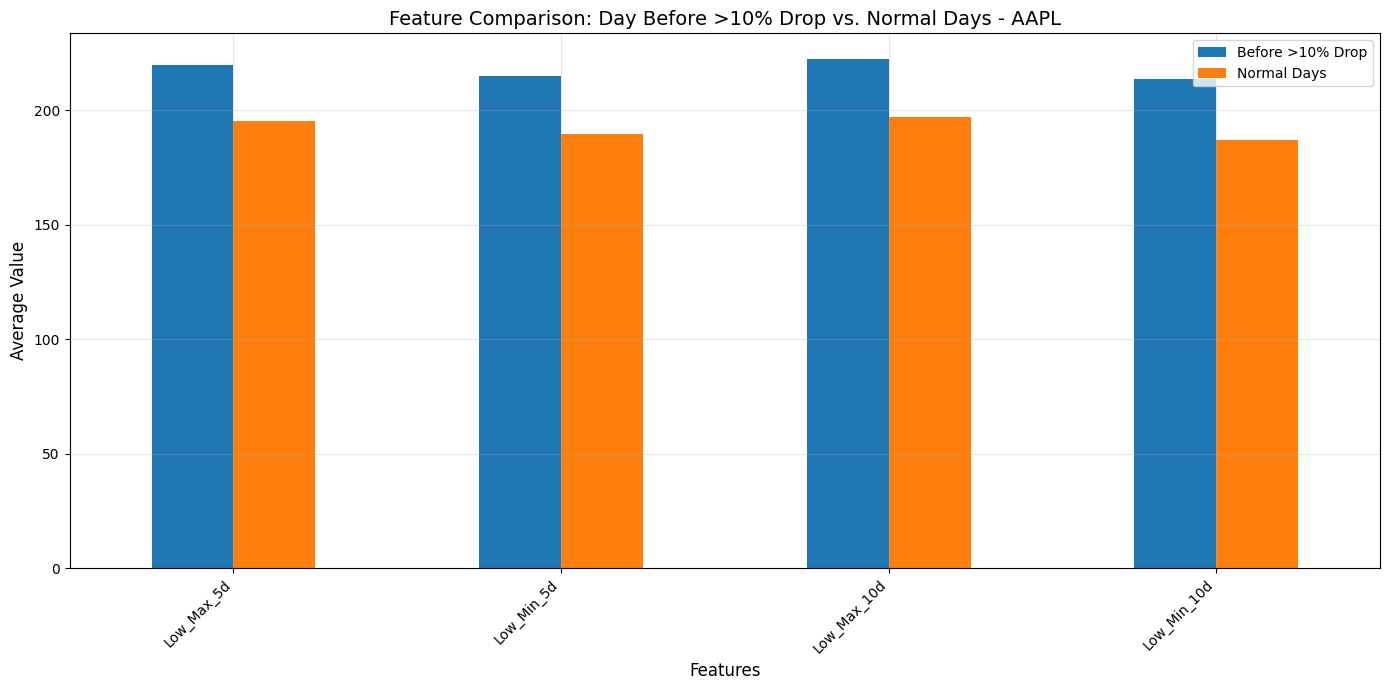

<Figure size 1400x700 with 0 Axes>

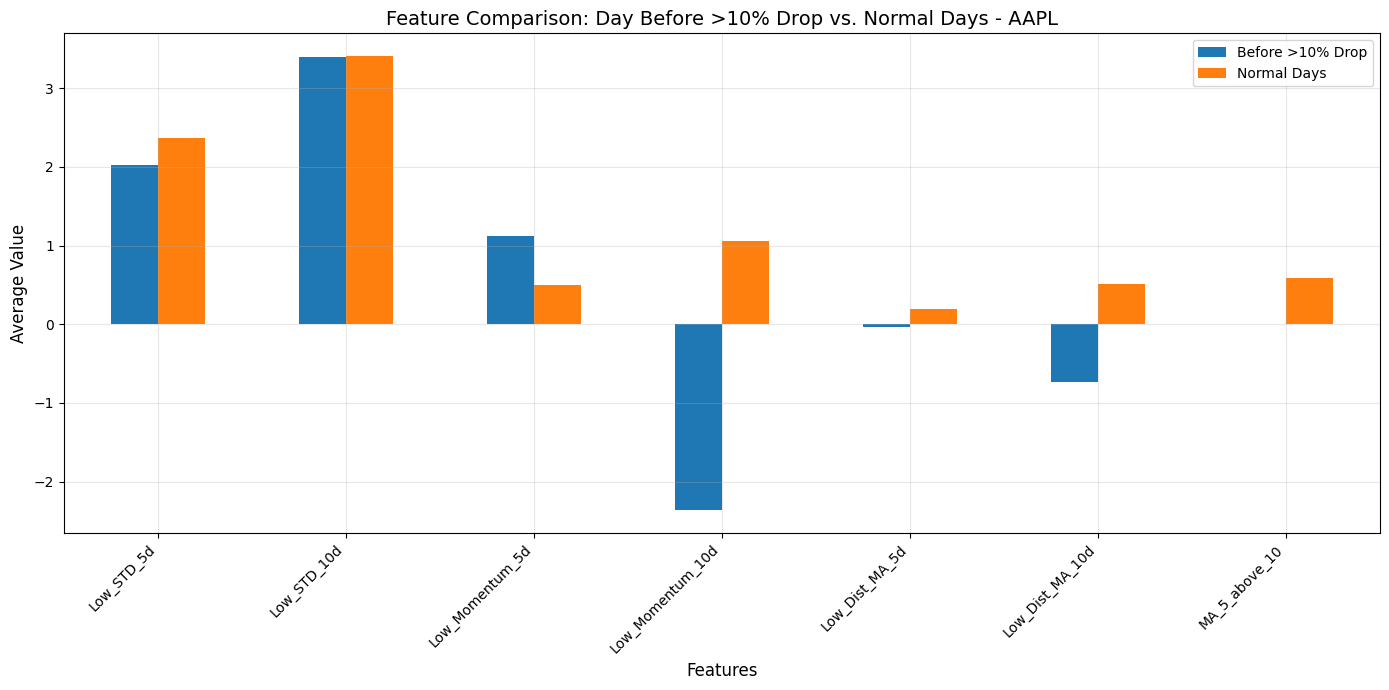


Feature Comparison: Day Before >10% Drop vs. Normal Days
                  Before_Drop  Normal_Days  Difference  Percent_Difference
Low_STD_5d           2.020409     2.362351   -0.341942              -14.47
Low_STD_10d          3.392803     3.407554   -0.014751               -0.43
Low_Momentum_5d      1.118253     0.497291    0.620962              124.87
Low_Momentum_10d    -2.361996     1.054376   -3.416373             -324.02
Low_Dist_MA_5d      -0.039614     0.193906   -0.233520             -120.43
Low_Dist_MA_10d     -0.737769     0.508803   -1.246572             -245.00
MA_5_above_10        0.000000     0.593561   -0.593561             -100.00
['Low_STD_5d', 'Low_STD_10d', 'Low_Momentum_5d', 'Low_Momentum_10d', 'Low_Dist_MA_5d', 'Low_Dist_MA_10d', 'Low_Max_5d', 'Low_Min_5d', 'Low_Max_10d', 'Low_Min_10d', 'MA_5_above_10']


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

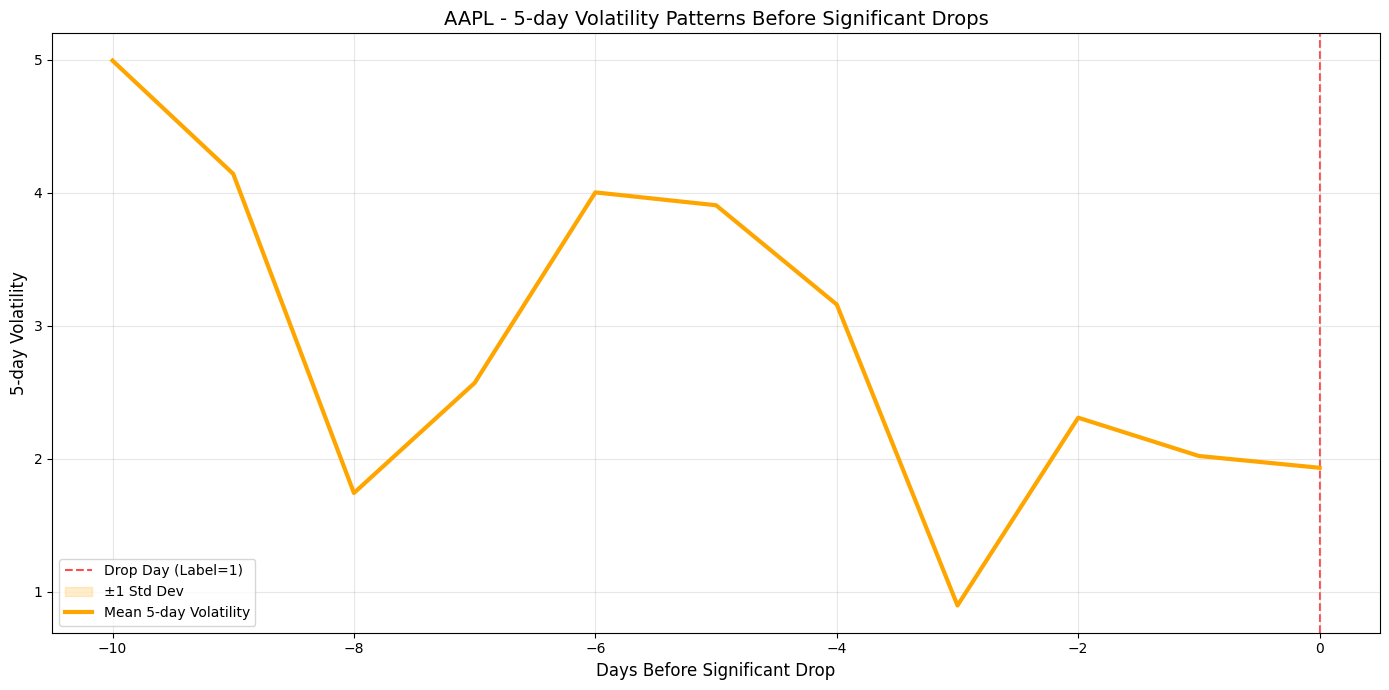


5-day Volatility Pattern Analysis:
Average starting value: 5.00
Average value on drop day: 1.93
Average change: -3.06 (-61.33% of starting value)
Data points analyzed: 1


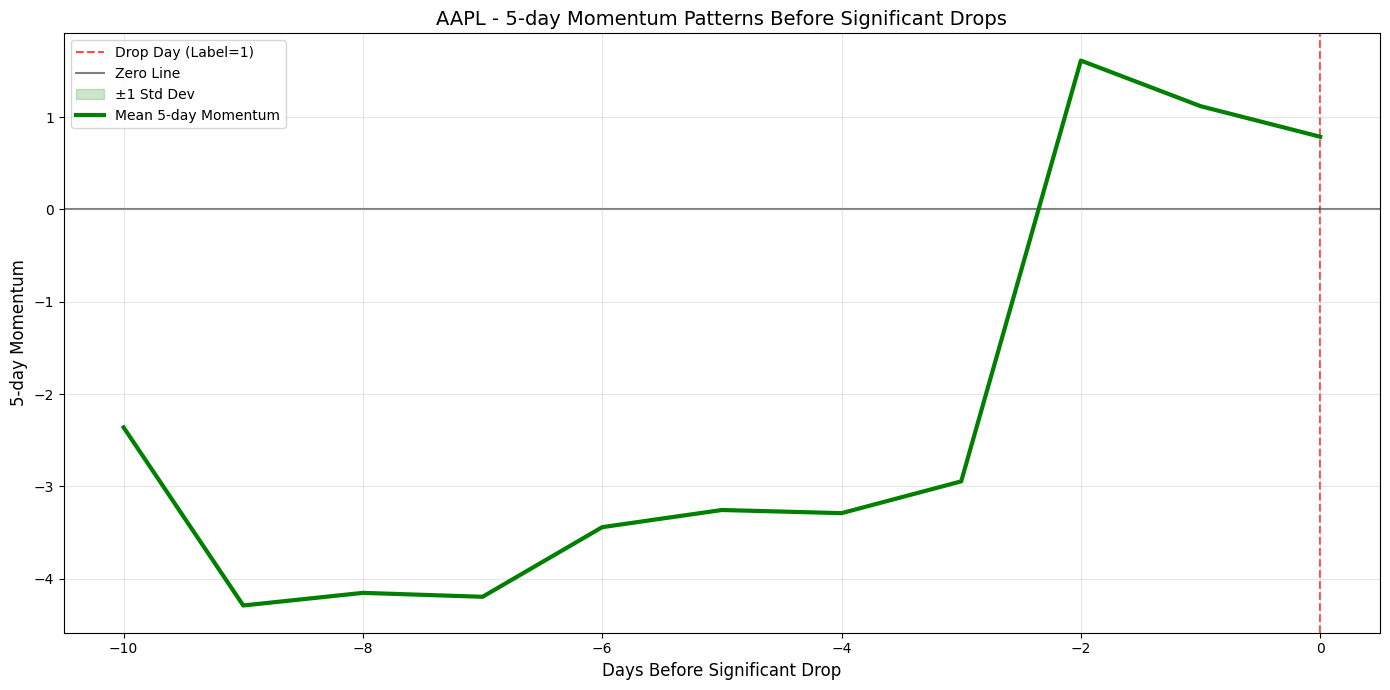


5-day Momentum Pattern Analysis:
Average starting value: -2.36
Average value on drop day: 0.79
Average change: 3.15 (-133.33% of starting value)
Data points analyzed: 1


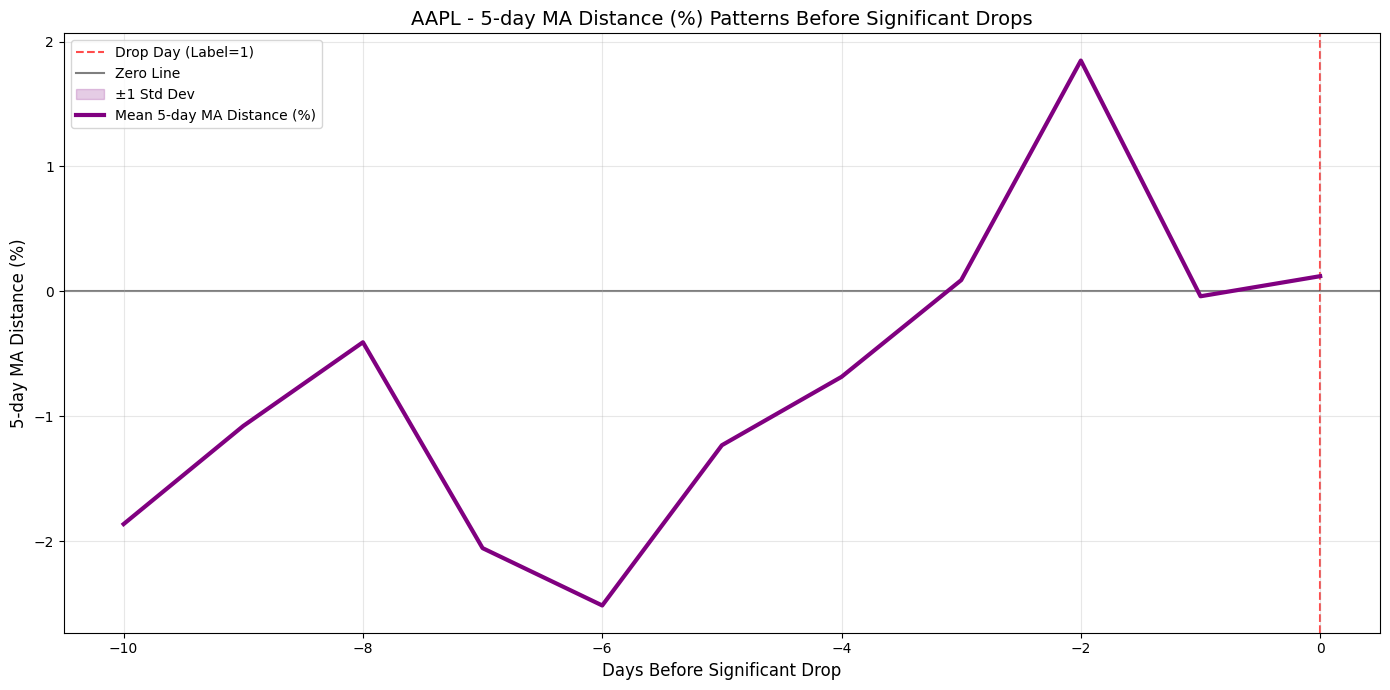


5-day MA Distance (%) Pattern Analysis:
Average starting value: -1.86
Average value on drop day: 0.12
Average change: 1.99 (-106.51% of starting value)
Data points analyzed: 1


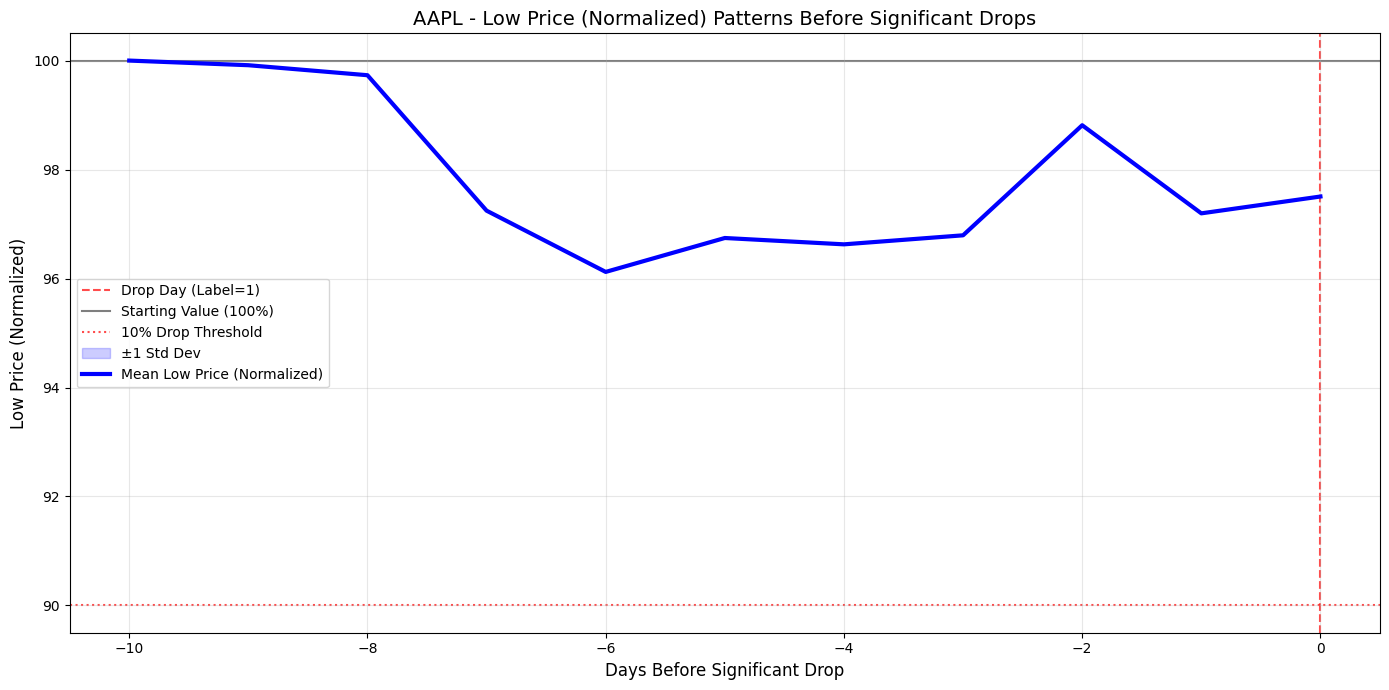


Low Price (Normalized) Pattern Analysis:
Average starting value: 100.00
Average value on drop day: 97.51
Average change: -2.49 (-2.49% of starting value)
Data points analyzed: 1
Visualization for MRNA

First 5 rows of the dataframe:
        Date         Low        Open  Label   Low_MA_5d  Low_STD_5d  Low_Min_5d  Low_Max_5d  Low_Dist_MA_5d  Low_Momentum_5d  Low_MA_10d  Low_STD_10d  Low_Min_10d  Low_Max_10d  Low_Dist_MA_10d  Low_Momentum_10d  Volatility_Ratio_5_10  MA_5_above_10
0 2023-02-21  159.490005  165.250000      0  147.027802    10.60311  136.720001  159.490005       -7.010783       -13.869214    142.2289     8.982336   133.660004   159.490005         0.282014        -12.420849               0.378124              0
1 2023-02-22  157.000000  160.350006      1  147.027802    10.60311  136.720001  159.490005       -7.010783       -13.869214    142.2289     8.982336   133.660004   159.490005         0.282014        -12.420849               0.378124              0
2 2023-02-23  143.7

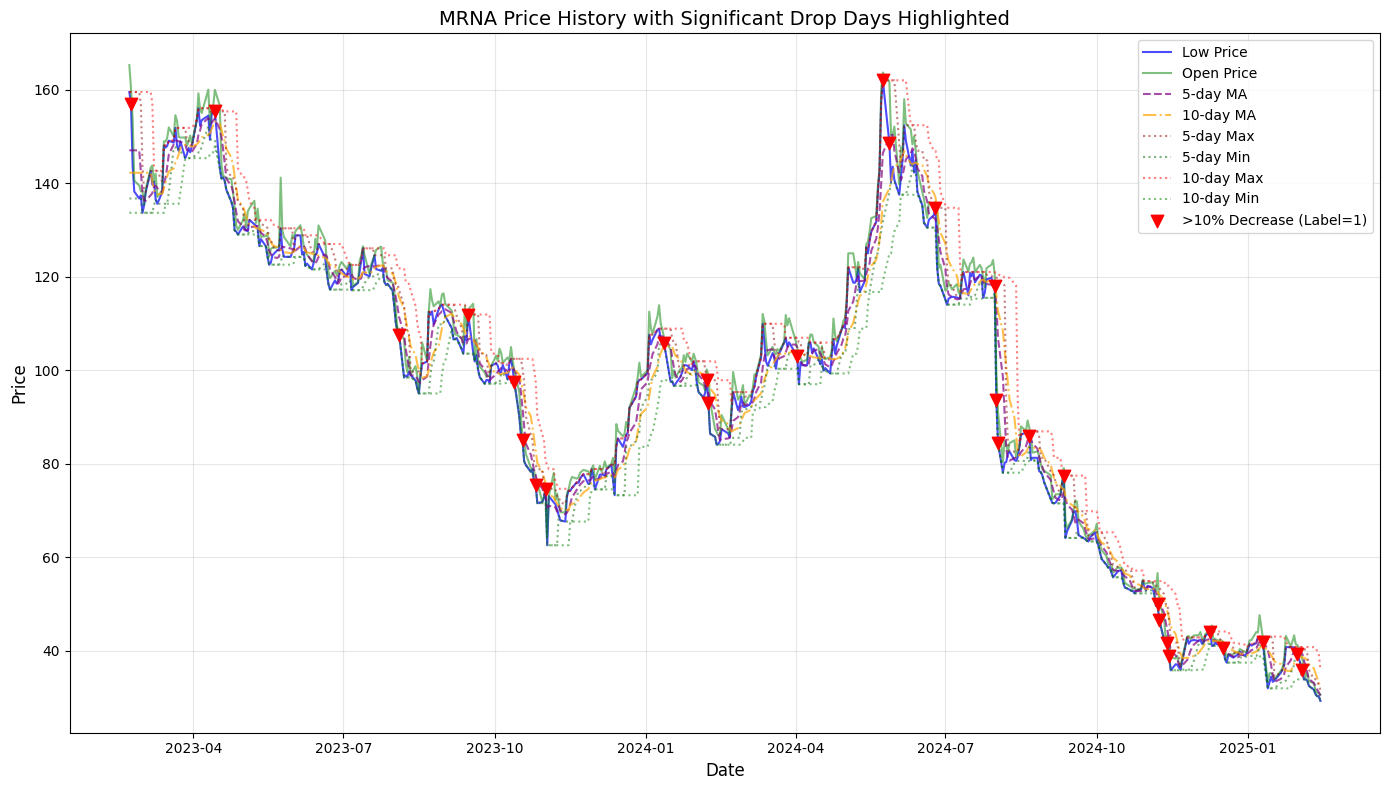

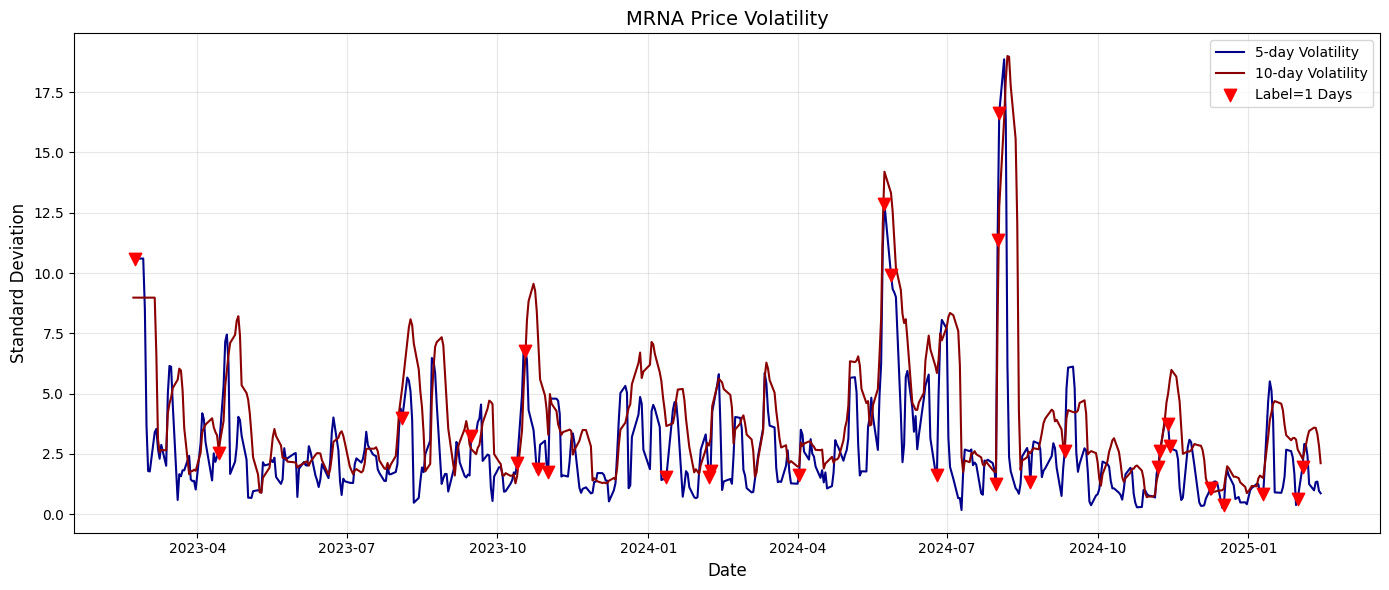

<Figure size 1400x700 with 0 Axes>

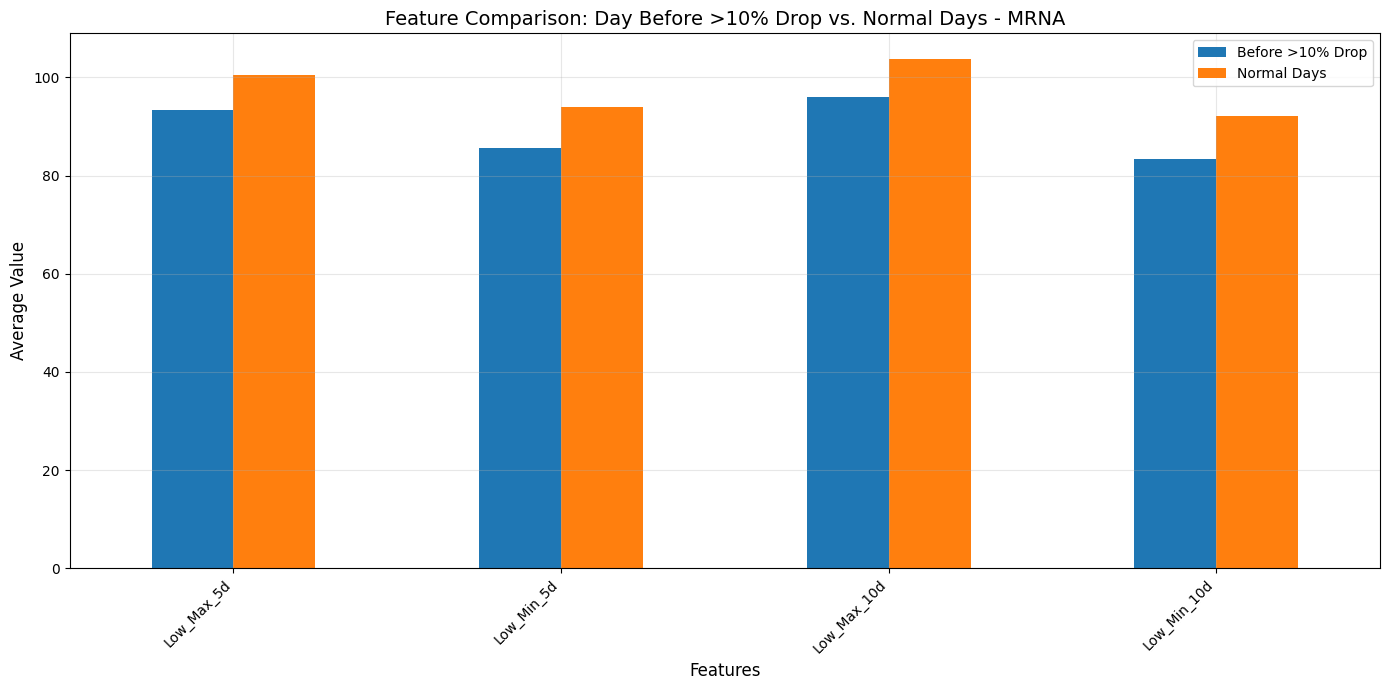

<Figure size 1400x700 with 0 Axes>

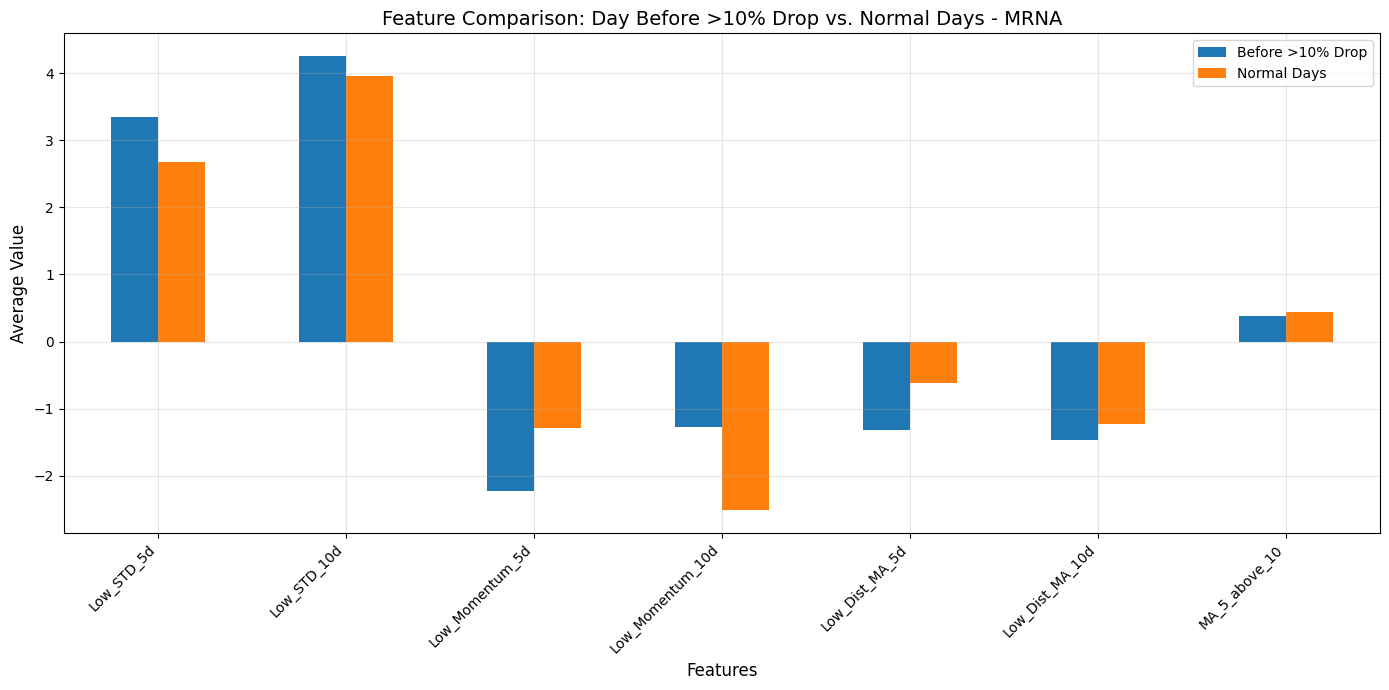


Feature Comparison: Day Before >10% Drop vs. Normal Days
                  Before_Drop  Normal_Days  Difference  Percent_Difference
Low_STD_5d           3.338329     2.680109    0.658220               24.56
Low_STD_10d          4.252679     3.953727    0.298952                7.56
Low_Momentum_5d     -2.228318    -1.279903   -0.948415               74.10
Low_Momentum_10d    -1.270514    -2.509545    1.239032              -49.37
Low_Dist_MA_5d      -1.320824    -0.612739   -0.708085              115.56
Low_Dist_MA_10d     -1.467795    -1.219376   -0.248418               20.37
MA_5_above_10        0.379310     0.443497   -0.064186              -14.47
['Low_STD_5d', 'Low_STD_10d', 'Low_Momentum_5d', 'Low_Momentum_10d', 'Low_Dist_MA_5d', 'Low_Dist_MA_10d', 'Low_Max_5d', 'Low_Min_5d', 'Low_Max_10d', 'Low_Min_10d', 'MA_5_above_10']


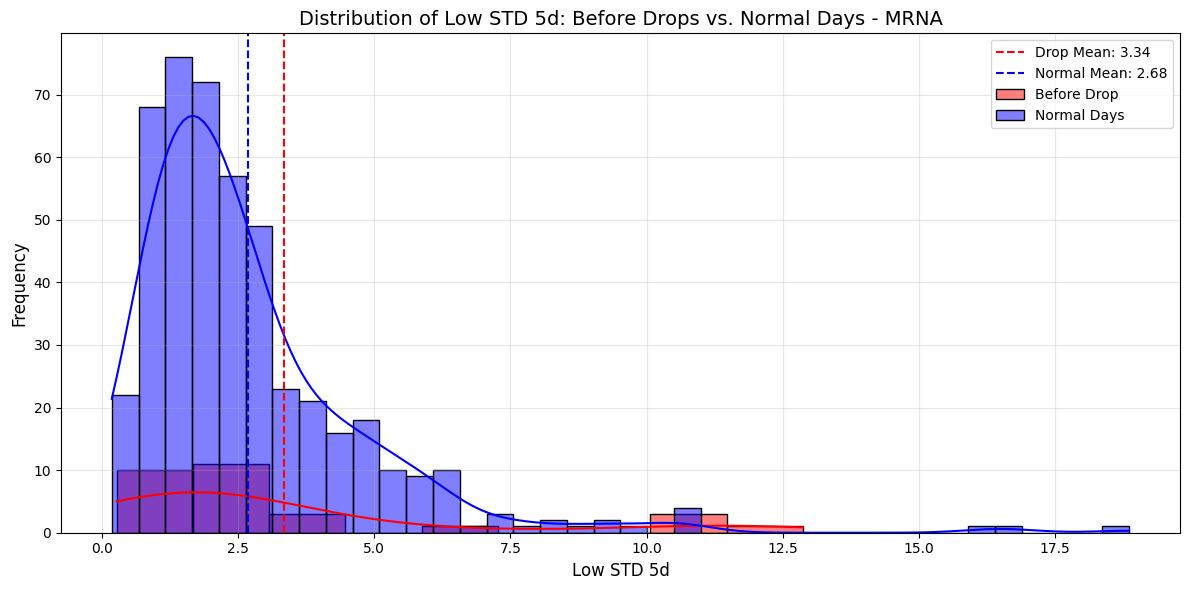

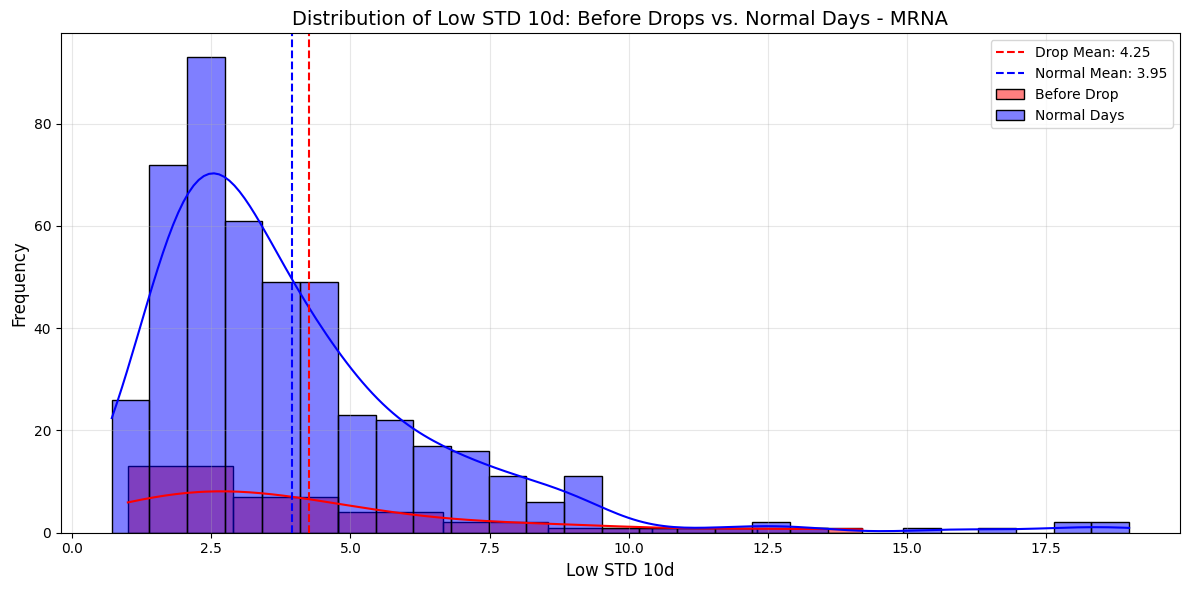

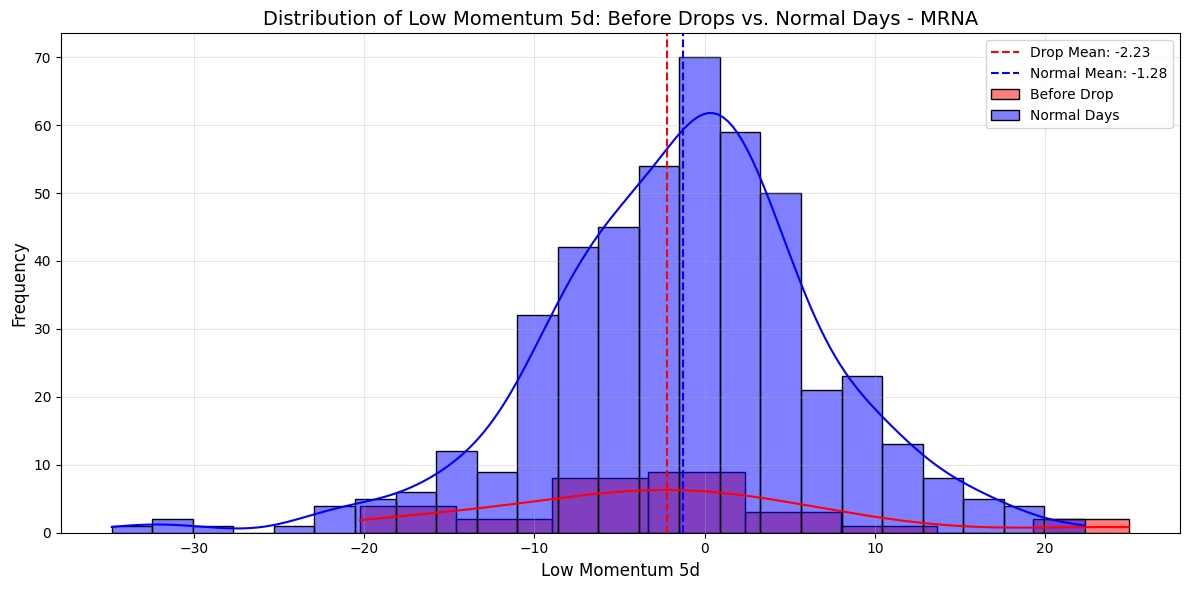

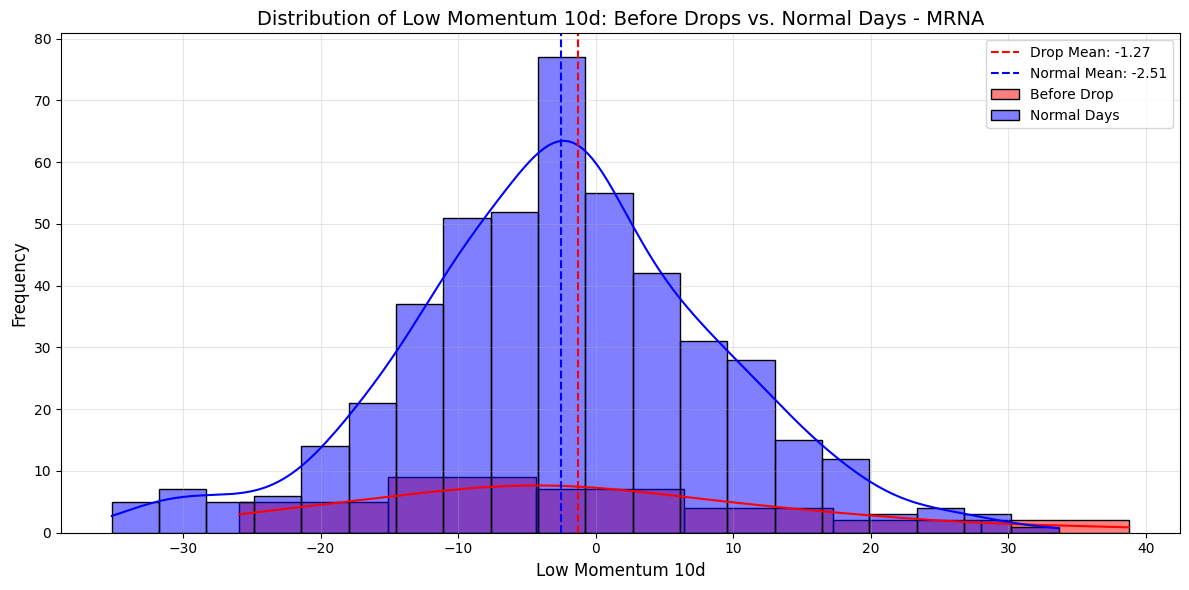

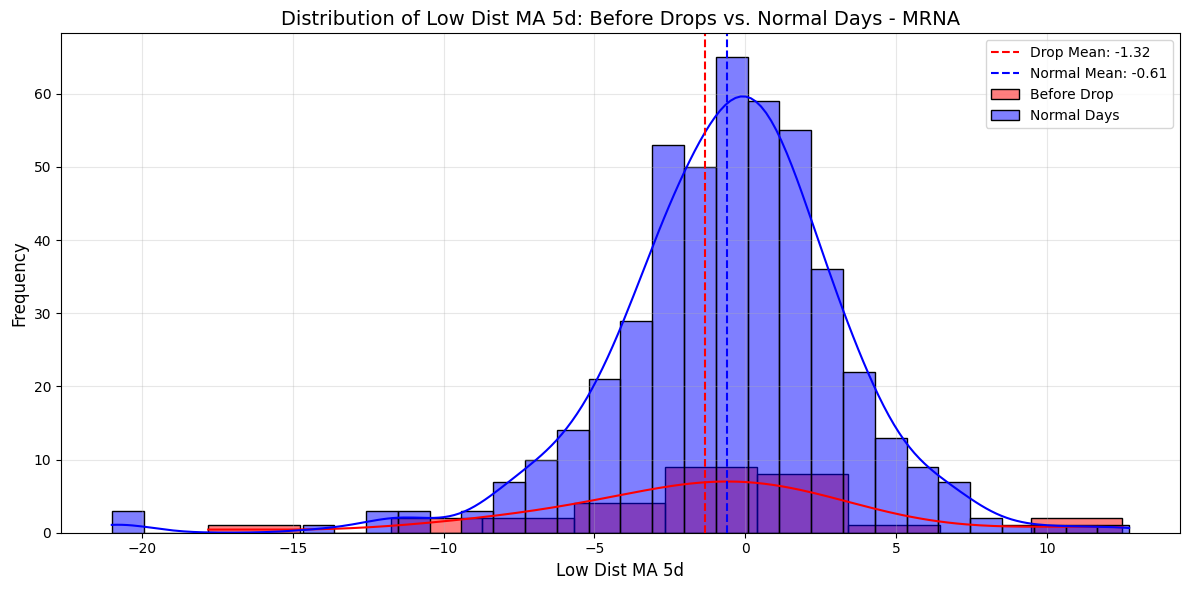

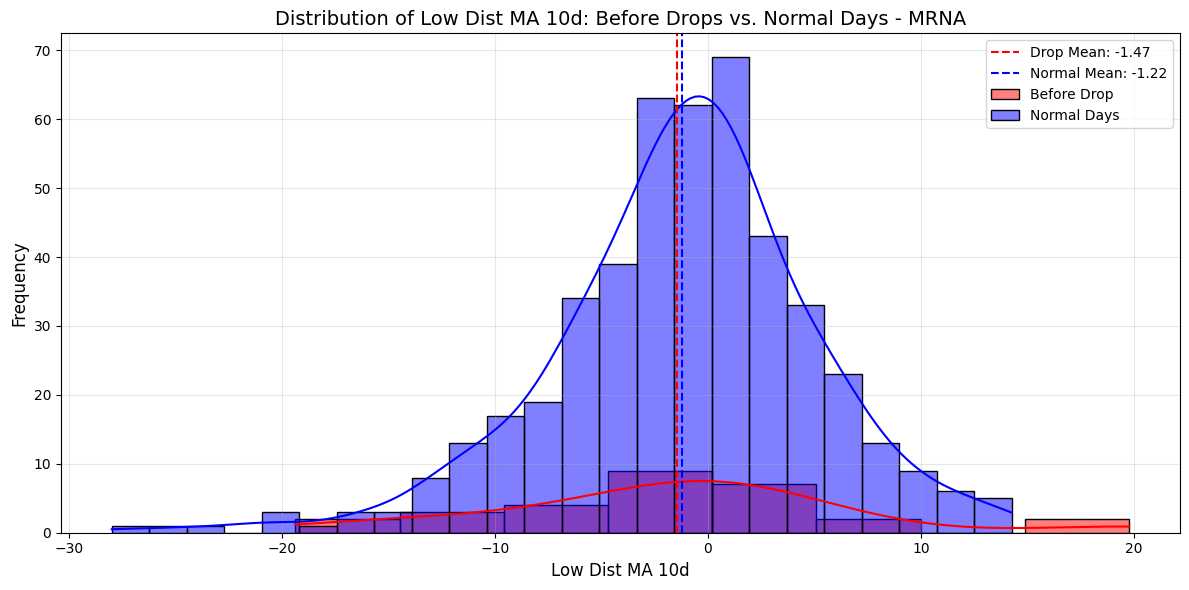

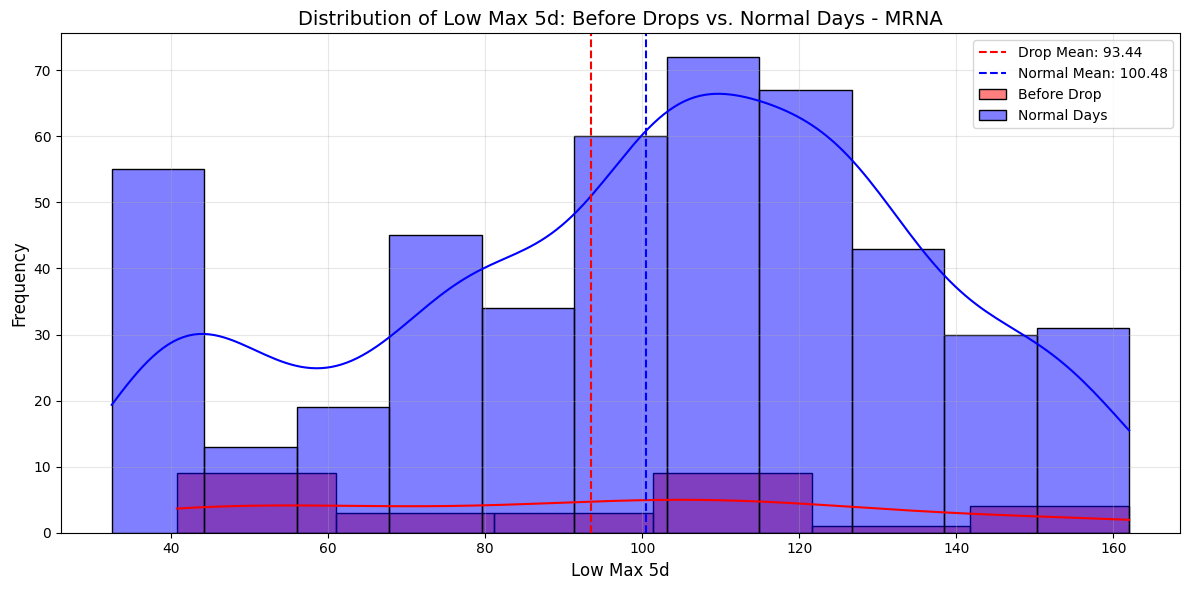

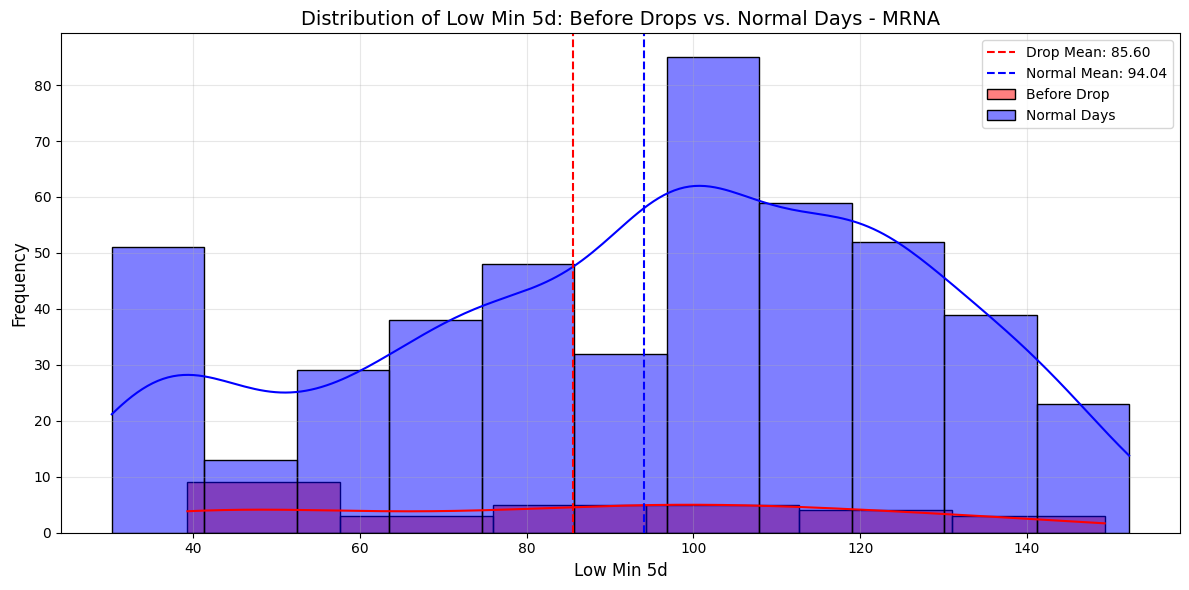

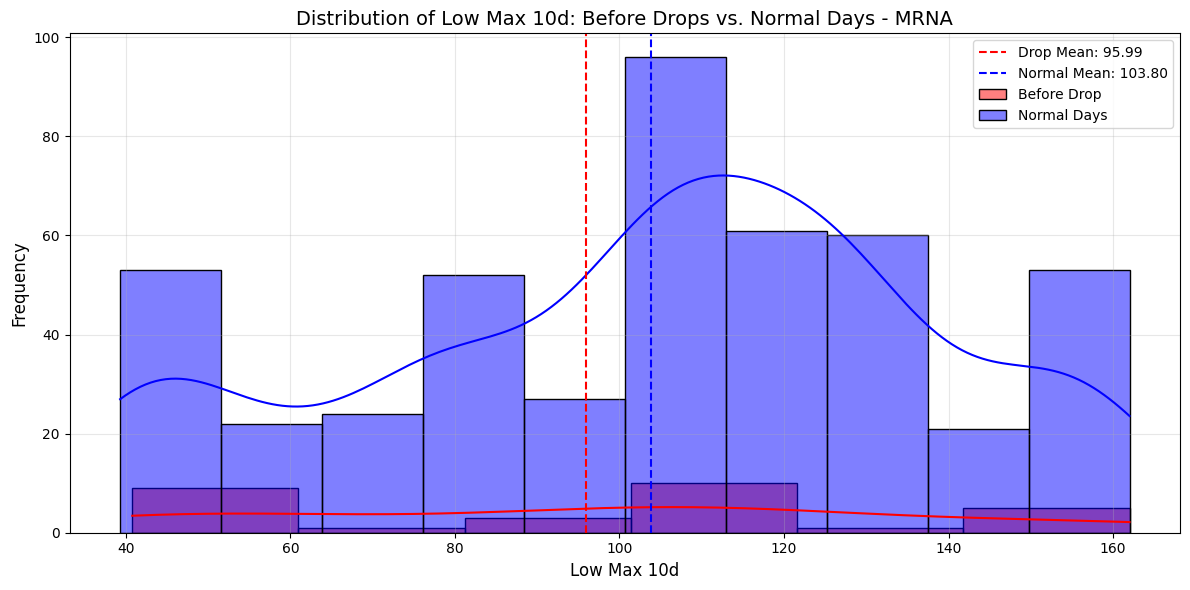

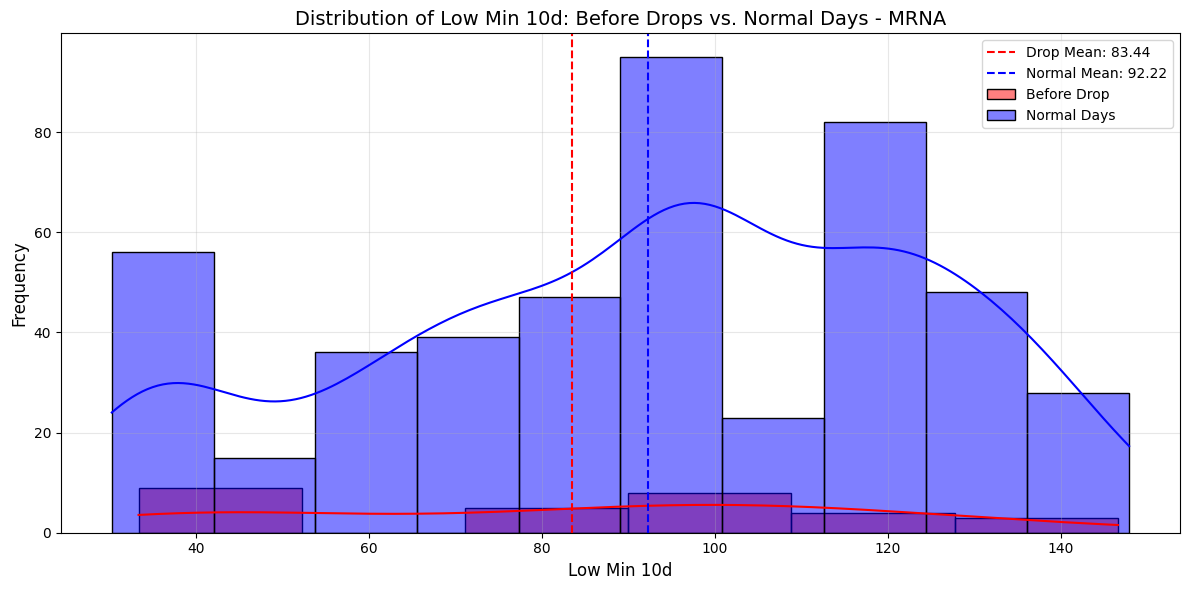

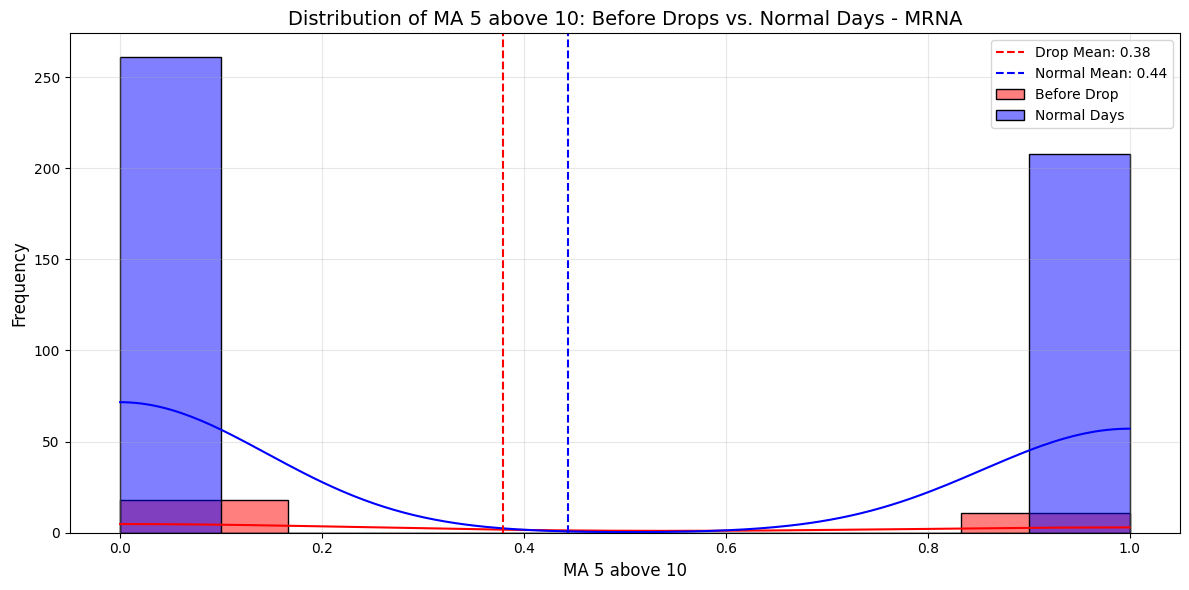

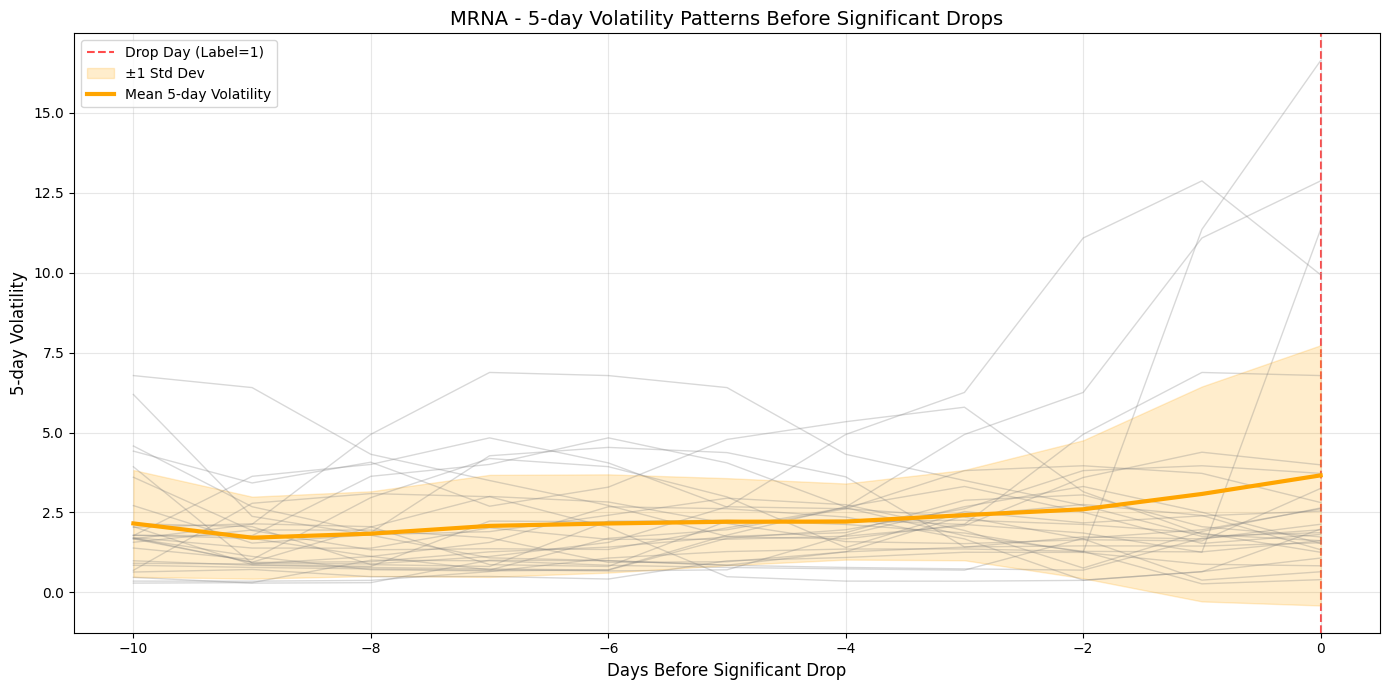


5-day Volatility Pattern Analysis:
Average starting value: 2.16
Average value on drop day: 3.66
Average change: 1.50 (69.72% of starting value)
Data points analyzed: 28


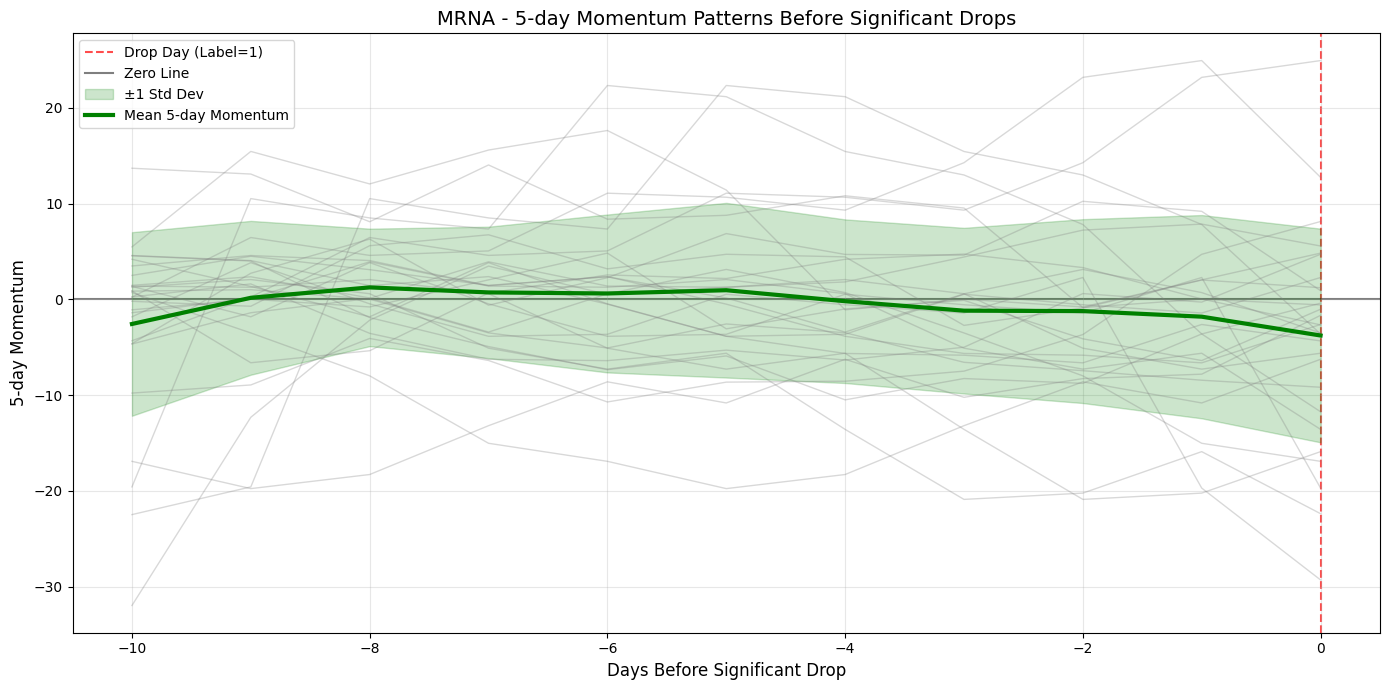


5-day Momentum Pattern Analysis:
Average starting value: -2.57
Average value on drop day: -3.78
Average change: -1.20 (46.75% of starting value)
Data points analyzed: 28


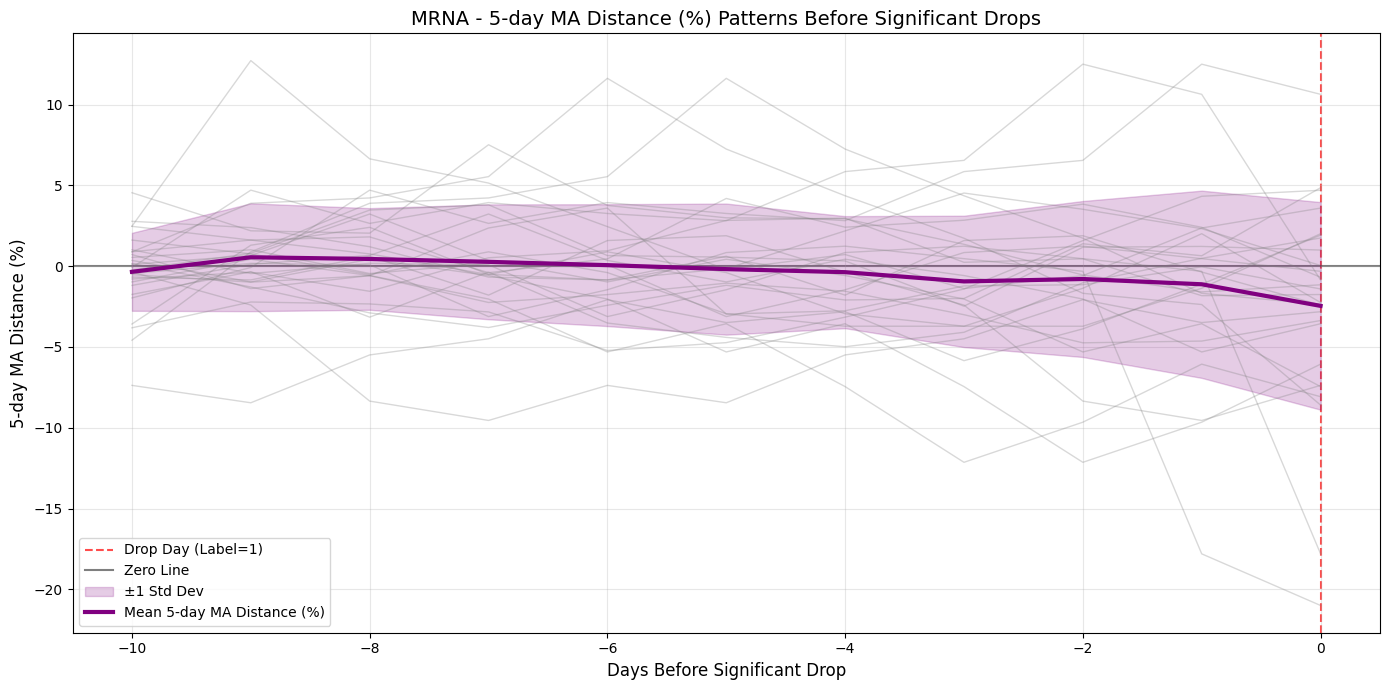


5-day MA Distance (%) Pattern Analysis:
Average starting value: -0.35
Average value on drop day: -2.46
Average change: -2.11 (607.31% of starting value)
Data points analyzed: 28


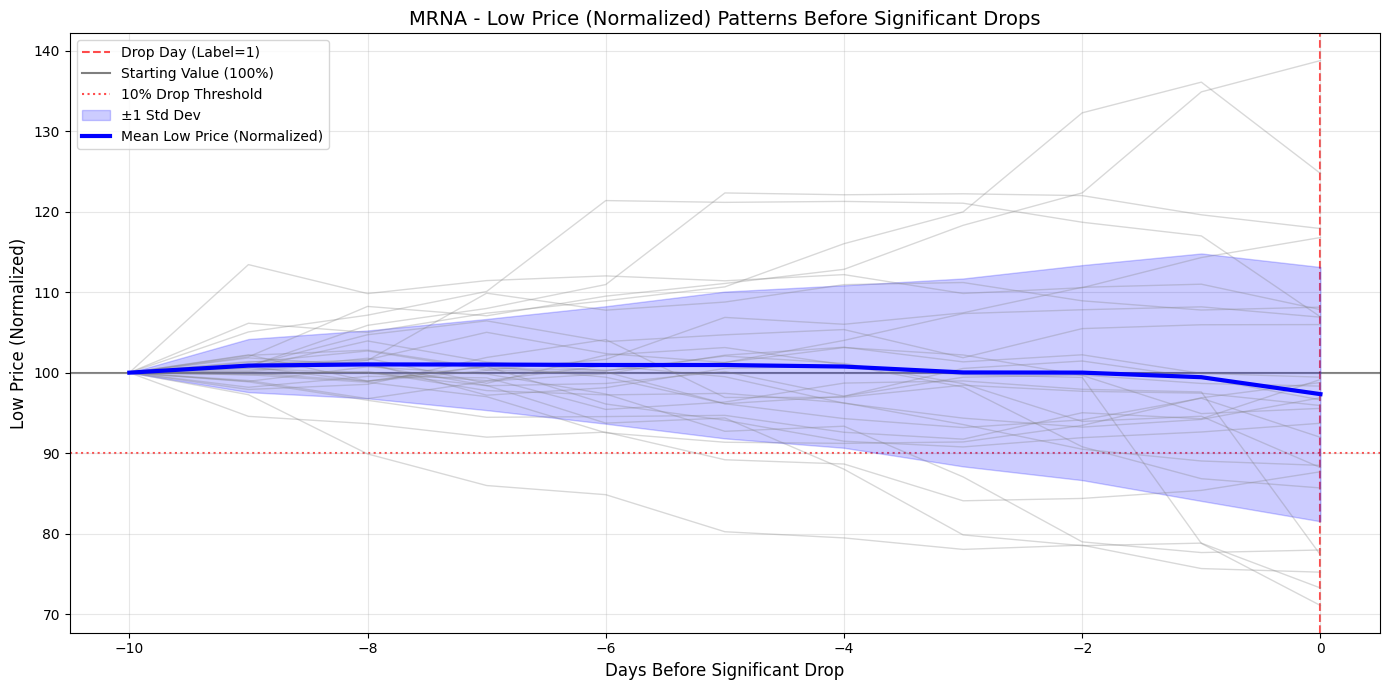


Low Price (Normalized) Pattern Analysis:
Average starting value: 100.00
Average value on drop day: 97.33
Average change: -2.67 (-2.67% of starting value)
Data points analyzed: 28


In [51]:
def visualize_stock_data(stock_dict, stock_name=None):
    """
    Visualizes stock data as tables and time series plots with highlighted label=1 points.
    Includes comprehensive future comparisons and histogram distributions.
    
    Args:
        stock_dict: Dictionary of enhanced stock dataframes
        stock_name: Optional specific stock to visualize. If None, visualizes all stocks.
    """
    if stock_name is not None:
        # Visualize just one stock
        if stock_name in stock_dict:
            _visualize_single_stock(stock_dict[stock_name], stock_name)
        else:
            print(f"Stock {stock_name} not found in the dictionary.")
    else:
        # Visualize all stocks
        for name, df in stock_dict.items():
            _visualize_single_stock(df, name)
            print("\n" + "="*80 + "\n")  # Separator between stocks


def _visualize_single_stock(df, stock_name):
    """Helper function to visualize a single stock dataframe with emphasis on Label=1 instances"""
    print(f"Visualization for {stock_name}")
    
    # Make a copy to avoid modifying the original
    df_copy = df.copy()
    
    # Ensure Date column is datetime
    df_copy['Date'] = pd.to_datetime(df_copy['Date'])
    
    # Display dataframe head as a table
    print("\nFirst 5 rows of the dataframe:")
    print(df_copy.head().to_string())
    
    # Display rows where Label=1 as a table
    drop_days = df_copy[df_copy['Label'] == 1]
    print(f"\nRows where Label=1 (>10% price drop) - Total: {len(drop_days)}")
    if not drop_days.empty:
        print(drop_days.to_string())
    else:
        print("No instances with Label=1 found in this dataframe.")
    
    # Create time series plots with matplotlib
    plt.figure(figsize=(14, 8))
    
    # Price plot with Label=1 highlighted
    plt.plot(df_copy['Date'], df_copy['Low'], label='Low Price', color='blue', alpha=0.7)
    plt.plot(df_copy['Date'], df_copy['Open'], label='Open Price', color='green', alpha=0.5)
    
    # Add moving averages if they exist (excluding 20-day)
    if 'Low_MA_5d' in df_copy.columns:
        plt.plot(df_copy['Date'], df_copy['Low_MA_5d'], label='5-day MA', linestyle='--', color='purple', alpha=0.7)
    if 'Low_MA_10d' in df_copy.columns:
        plt.plot(df_copy['Date'], df_copy['Low_MA_10d'], label='10-day MA', linestyle='-.', color='orange', alpha=0.7)
    
    # Add min and max values if they exist (excluding 20-day)
    if 'Low_Max_5d' in df_copy.columns:
        plt.plot(df_copy['Date'], df_copy['Low_Max_5d'], label='5-day Max', linestyle=':', color='darkred', alpha=0.5)
    if 'Low_Min_5d' in df_copy.columns:
        plt.plot(df_copy['Date'], df_copy['Low_Min_5d'], label='5-day Min', linestyle=':', color='darkgreen', alpha=0.5)
    if 'Low_Max_10d' in df_copy.columns:
        plt.plot(df_copy['Date'], df_copy['Low_Max_10d'], label='10-day Max', linestyle=':', color='red', alpha=0.5)
    if 'Low_Min_10d' in df_copy.columns:
        plt.plot(df_copy['Date'], df_copy['Low_Min_10d'], label='10-day Min', linestyle=':', color='green', alpha=0.5)
    
    # Mark days with Label=1 (significant drops)
    if not drop_days.empty:
        plt.scatter(drop_days['Date'], drop_days['Low'], color='red', s=80, marker='v',
                   label='>10% Decrease (Label=1)', zorder=5)
    
    plt.title(f'{stock_name} Price History with Significant Drop Days Highlighted', fontsize=14)
    plt.ylabel('Price', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Volatility plot
    plt.figure(figsize=(14, 6))
    if 'Low_STD_5d' in df_copy.columns:
        plt.plot(df_copy['Date'], df_copy['Low_STD_5d'], label='5-day Volatility', color='darkblue')
    if 'Low_STD_10d' in df_copy.columns:
        plt.plot(df_copy['Date'], df_copy['Low_STD_10d'], label='10-day Volatility', color='darkred')
    
    # Mark days with Label=1 on volatility plot
    if not drop_days.empty and 'Low_STD_5d' in df_copy.columns:
        plt.scatter(drop_days['Date'], drop_days['Low_STD_5d'], color='red', s=80, marker='v',
                   label='Label=1 Days', zorder=5)
    
    plt.title(f'{stock_name} Price Volatility', fontsize=14)
    plt.ylabel('Standard Deviation', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Create a feature analysis dashboard for Label=1
    if not drop_days.empty:
        # First, create a dataframe where each row is the day before a Label=1 day
        df_copy['Next_Day_Label'] = df_copy['Label'].shift(-1)
        before_drop = df_copy[df_copy['Next_Day_Label'] == 1].copy()
        normal_days = df_copy[df_copy['Next_Day_Label'] == 0].copy()
        
        # Select key features to compare (excluding 20-day measurements)
        key_features = []
        sub1 = []
        sub2 = []
        # Add volatility features if they exist
        if 'Low_STD_5d' in df_copy.columns:
            key_features.append('Low_STD_5d')
            sub1.append('Low_STD_5d')

        if 'Low_STD_10d' in df_copy.columns:
            key_features.append('Low_STD_10d')
            sub1.append('Low_STD_10d')

            
        # Add momentum features if they exist
        if 'Low_Momentum_5d' in df_copy.columns:
            key_features.append('Low_Momentum_5d')
            sub1.append('Low_Momentum_5d')

        if 'Low_Momentum_10d' in df_copy.columns:
            key_features.append('Low_Momentum_10d')
            sub1.append('Low_Momentum_10d')

            
        # Add MA distance features if they exist
        if 'Low_Dist_MA_5d' in df_copy.columns:
            key_features.append('Low_Dist_MA_5d')
            sub1.append('Low_Dist_MA_5d')

        if 'Low_Dist_MA_10d' in df_copy.columns:
            key_features.append('Low_Dist_MA_10d')
            sub1.append('Low_Dist_MA_10d')

            
        # Add Min and Max features if they exist
        if 'Low_Max_5d' in df_copy.columns:
            key_features.append('Low_Max_5d')
            sub2.append('Low_Max_5d')

        if 'Low_Min_5d' in df_copy.columns:
            key_features.append('Low_Min_5d')
            sub2.append('Low_Min_5d')

        if 'Low_Max_10d' in df_copy.columns:
            key_features.append('Low_Max_10d')
            sub2.append('Low_Max_10d')

        if 'Low_Min_10d' in df_copy.columns:
            key_features.append('Low_Min_10d')
            sub2.append('Low_Min_10d')

            
        # Add Moving Average crossover indicators if they exist
        if 'MA_5_above_10' in df_copy.columns:
            key_features.append('MA_5_above_10')
            sub1.append('MA_5_above_10')
        
        # If at least one feature found, create comparison plots
        if sub2:
            # Compare means of features before drops vs. normal days
            plt.figure(figsize=(14, 7))
            feature_means_drop = before_drop[sub2].mean()
            feature_means_normal = normal_days[sub2].mean()
            
            # Create comparison dataframe
            compare_df = pd.DataFrame({
                'Before_Drop': feature_means_drop,
                'Normal_Days': feature_means_normal
            })
            
            # Plot comparison
            compare_df.plot(kind='bar', figsize=(14, 7))
            plt.title(f'Feature Comparison: Day Before >10% Drop vs. Normal Days - {stock_name}', fontsize=14)
            plt.ylabel('Average Value', fontsize=12)
            plt.xlabel('Features', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.legend(['Before >10% Drop', 'Normal Days'])
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()




        if sub1:
            # Compare means of features before drops vs. normal days
            plt.figure(figsize=(14, 7))
            feature_means_drop = before_drop[sub1].mean()
            feature_means_normal = normal_days[sub1].mean()
            
            # Create comparison dataframe
            compare_df = pd.DataFrame({
                'Before_Drop': feature_means_drop,
                'Normal_Days': feature_means_normal
            })
            
            # Plot comparison
            compare_df.plot(kind='bar', figsize=(14, 7))
            plt.title(f'Feature Comparison: Day Before >10% Drop vs. Normal Days - {stock_name}', fontsize=14)
            plt.ylabel('Average Value', fontsize=12)
            plt.xlabel('Features', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.legend(['Before >10% Drop', 'Normal Days'])
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()






            
            # Create a table with actual values
            print("\nFeature Comparison: Day Before >10% Drop vs. Normal Days")
            compare_table = compare_df.copy()
            compare_table['Difference'] = compare_table['Before_Drop'] - compare_table['Normal_Days']
            compare_table['Percent_Difference'] = (compare_table['Difference'] / compare_table['Normal_Days'] * 100).round(2)
            print(compare_table)
            
            # Add histogram comparisons for key features
            # Select the most important features for histogram visualization

            histogram_features = []
            print(key_features)
            # Create readable labels for all features in key_features
            for feature in key_features:
                # Add a readable label
                label = feature.replace('_', ' ')
                histogram_features.append((feature, label))
                        
            # Create histograms for selected features
            for feature, label in histogram_features:
                plt.figure(figsize=(12, 6))
                
                # Get data for days before drops and normal days
                drop_values = before_drop[feature].dropna()
                normal_values = normal_days[feature].dropna()
                
                # Skip if not enough data
                if len(drop_values) < 5 or len(normal_values) < 5:
                    continue
                
                # Create histograms with KDE
                sns.histplot(drop_values, color='red', alpha=0.5, label='Before Drop', kde=True)
                sns.histplot(normal_values, color='blue', alpha=0.5, label='Normal Days', kde=True)
                
                # Add vertical lines for means
                plt.axvline(drop_values.mean(), color='red', linestyle='--', 
                           label=f'Drop Mean: {drop_values.mean():.2f}')
                plt.axvline(normal_values.mean(), color='blue', linestyle='--',
                           label=f'Normal Mean: {normal_values.mean():.2f}')
                
                plt.title(f'Distribution of {label}: Before Drops vs. Normal Days - {stock_name}', fontsize=14)
                plt.xlabel(label, fontsize=12)
                plt.ylabel('Frequency', fontsize=12)
                plt.legend()
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()
    
    # Create comprehensive future comparisons for various features
    try:
        if not drop_days.empty:
            # List of features to analyze their patterns before drops
            features_to_analyze = []
            
            # Add volatility features
            if 'Low_STD_5d' in df_copy.columns:
                features_to_analyze.append(('Low_STD_5d', '5-day Volatility', 'orange'))
            
            # Add momentum features
            if 'Low_Momentum_5d' in df_copy.columns:
                features_to_analyze.append(('Low_Momentum_5d', '5-day Momentum', 'green'))
            
            # Add distance from MA features
            if 'Low_Dist_MA_5d' in df_copy.columns:
                features_to_analyze.append(('Low_Dist_MA_5d', '5-day MA Distance (%)', 'purple'))
            
            # Basic price features
            features_to_analyze.append(('Low', 'Low Price (Normalized)', 'blue'))
            
            # Create pattern visualization for each feature
            for feature_name, feature_label, color in features_to_analyze:
                plt.figure(figsize=(14, 7))
                
                # Get indices of days with Label=1
                drop_indices = df_copy[df_copy['Label'] == 1].index
                
                # Initialize lists to store aligned data
                aligned_data = []
                
                # For each drop day, get the 10 days before
                for idx in drop_indices:
                    if idx >= 10:  # Make sure we have enough history
                        # Get 10 days of data before the drop
                        pre_drop_window = df_copy.iloc[idx-10:idx+1].copy()
                        
                        # Skip if there are NaNs in this feature
                        if pre_drop_window[feature_name].isna().any():
                            continue
                        
                        # Normalize the feature values if it's price
                        if feature_name == 'Low':
                            base_value = pre_drop_window[feature_name].iloc[0]
                            pre_drop_window[f'Normalized_{feature_name}'] = pre_drop_window[feature_name] / base_value * 100
                            feature_values = pre_drop_window[f'Normalized_{feature_name}'].values
                        else:
                            # For other features, just use raw values
                            feature_values = pre_drop_window[feature_name].values
                        
                        # Add to our collection
                        aligned_data.append(feature_values)
                
                # Convert to DataFrame for easier plotting
                if aligned_data:
                    aligned_df = pd.DataFrame(aligned_data).T
                    aligned_df.index = range(-10, 1)
                    
                    # Calculate mean and standard deviation across all pre-drop periods
                    mean_values = aligned_df.mean(axis=1)
                    std_values = aligned_df.std(axis=1)
                    
                    # First draw the grid with lowest zorder
                    plt.grid(True, alpha=0.3, zorder=0)
                    
                    # Next draw reference lines
                    plt.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Drop Day (Label=1)', zorder=1)
                    
                    # Add horizontal reference line at starting point if it's price
                    if feature_name == 'Low':
                        plt.axhline(y=100, color='black', linestyle='-', alpha=0.5, label='Starting Value (100%)', zorder=1)
                        plt.axhline(y=90, color='red', linestyle=':', alpha=0.7, label='10% Drop Threshold', zorder=1)
                    else:
                        # For other features, add a zero line if appropriate
                        if feature_name.startswith('Low_Momentum') or feature_name.startswith('Low_Dist_MA'):
                            plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, label='Zero Line', zorder=1)
                    
                    # Then draw confidence band
                    plt.fill_between(aligned_df.index, 
                                    mean_values - std_values, 
                                    mean_values + std_values, 
                                    color=color, alpha=0.2, label='±1 Std Dev', zorder=2)
                    
                    # Then individual paths
                    for i in range(aligned_df.shape[1]):
                        plt.plot(aligned_df.index, aligned_df.iloc[:, i], color='gray', alpha=0.3, linewidth=1, zorder=3)
                    
                    # Finally plot the mean line with highest zorder
                    plt.plot(aligned_df.index, mean_values, color=color, linewidth=3, label=f'Mean {feature_label}', zorder=4)
                    
                    # Rest of the code...
                    plt.title(f'{stock_name} - {feature_label} Patterns Before Significant Drops', fontsize=14)
                    plt.xlabel('Days Before Significant Drop', fontsize=12)
                    plt.ylabel(feature_label, fontsize=12)
                    plt.legend(loc='best')
                    plt.tight_layout()
                    plt.show()
                    
                    # Print some statistics
                    first_value = mean_values.iloc[0]
                    last_value = mean_values.iloc[-1]
                    change = last_value - first_value
                    
                    print(f"\n{feature_label} Pattern Analysis:")
                    print(f"Average starting value: {first_value:.2f}")
                    print(f"Average value on drop day: {last_value:.2f}")
                    print(f"Average change: {change:.2f} ({(change/first_value*100):.2f}% of starting value)")
                    print(f"Data points analyzed: {len(aligned_data)}")
                
    except Exception as e:
        print(f"Error creating pattern analysis: {e}")


# Example usage
visualize_stock_data(enhanced_stocks, 'AAPL')
visualize_stock_data(enhanced_stocks, 'MRNA')

# visualize_stock_data(enhanced_stocks)  # Visualize all stocks

## **CORRELATION HEATMAP**

To see all features are really necessary (especially the derived ones)

Correlation Analysis for MRNA


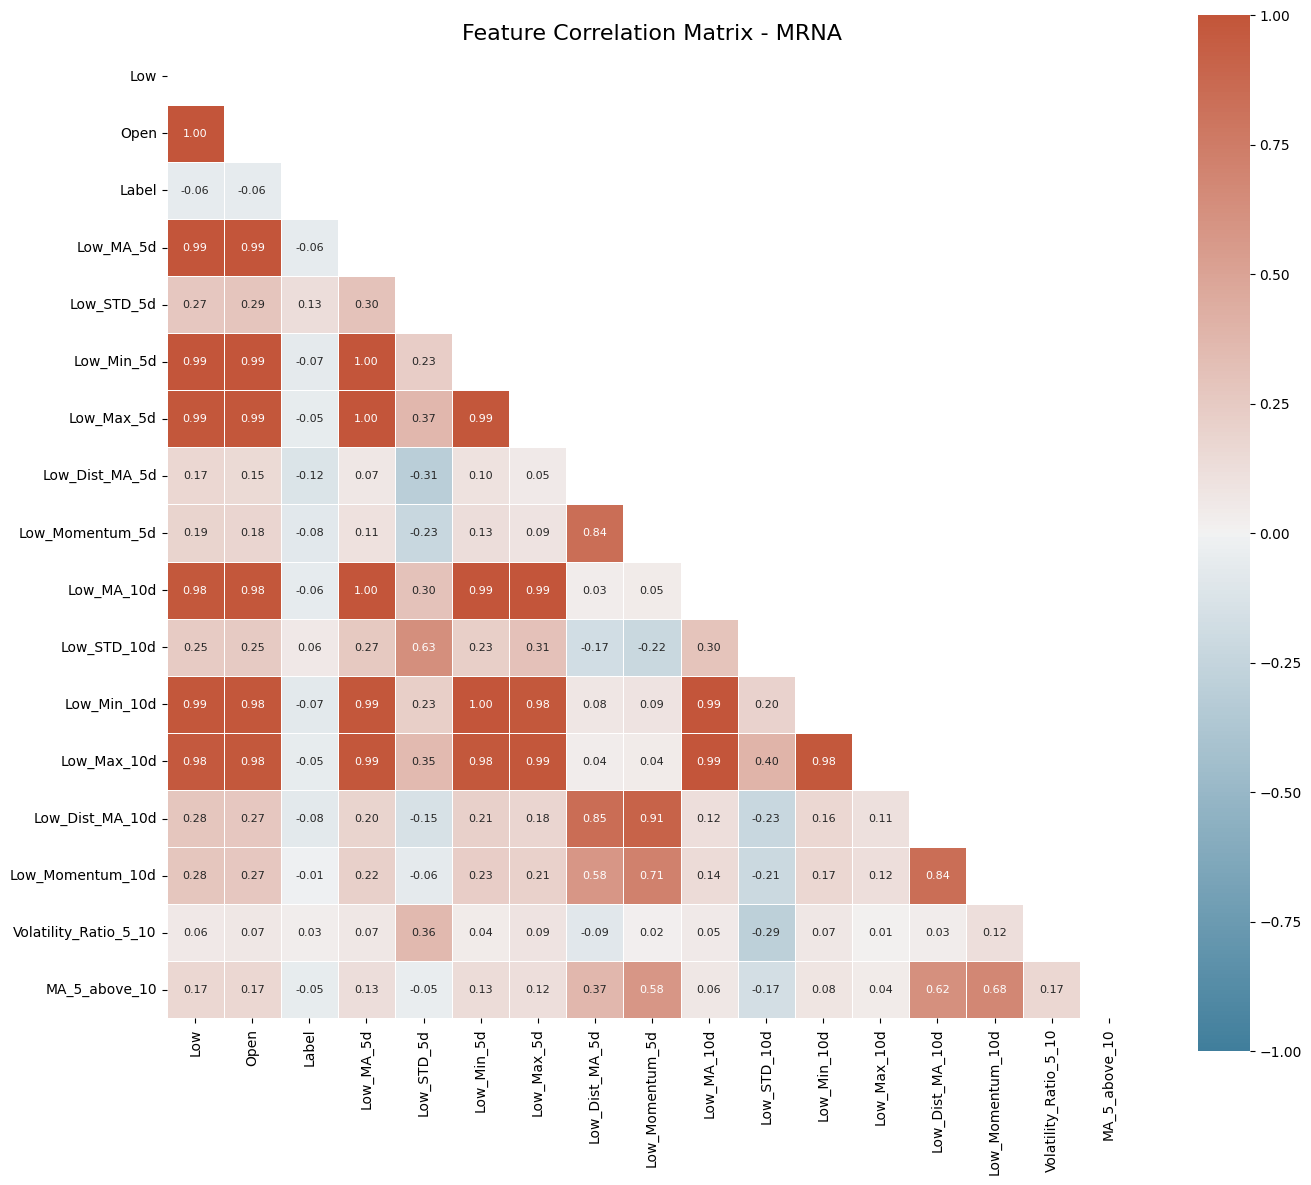

In [52]:
def create_correlation_heatmap(stock_dict, stock_name=None):
    """
    Creates a correlation heatmap between features in the enhanced stock dataframes.
    
    Args:
        stock_dict: Dictionary of enhanced stock dataframes
        stock_name: Optional specific stock to analyze. If None, analyzes all stocks.
    """

    
    if stock_name is not None:
        # Analyze just one stock
        if stock_name in stock_dict:
            _create_single_correlation_heatmap(stock_dict[stock_name], stock_name)

    else:
        # Analyze all stocks
        for name, df in stock_dict.items():
            _create_single_correlation_heatmap(df, name)
            print("\n" + "="*80 + "\n")  # Separator between stocks


def _create_single_correlation_heatmap(df, stock_name):
    """Helper function to create correlation heatmap for a single stock dataframe"""

    
    print(f"Correlation Analysis for {stock_name}")
    
    # Make a copy to avoid modifying the original
    df_copy = df.copy()
    
    # Drop date column since it's not meaningful for correlation
    if 'Date' in df_copy.columns:
        df_copy = df_copy.drop('Date', axis=1)
        
    # Drop any other non-numeric columns
    df_numeric = df_copy.select_dtypes(include=['float64', 'int64'])
    
    # Calculate correlation matrix
    corr_matrix = df_numeric.corr()
    
    # Create heatmap
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Create mask for upper triangle
    
    # Generate heatmap with improved readability
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, annot=True, fmt=".2f", annot_kws={"size": 8})
    
    plt.title(f'Feature Correlation Matrix - {stock_name}', fontsize=16)
    plt.tight_layout()
    plt.show()
    


# Example usage:
# create_correlation_heatmap(enhanced_stocks, 'AAPL')
create_correlation_heatmap(enhanced_stocks, 'MRNA')
# create_correlation_heatmap(enhanced_stocks)  # Analyze all stocks


## **DELETE HIGHLY CORRELATED FEATURES**

In [53]:
def delete_column_from_stocks(stock_dict, column_name):
    """
    Deletes a specified column from all stock dataframes in the dictionary.
    
    Args:
        stock_dict: Dictionary where keys are stock names and values are dataframes
        column_name: String representing the column name to be deleted
    
    Returns:
        Dictionary with dataframes where the specified column has been removed
    """
    result_dict = {}
    
    for stock_name, df in stock_dict.items():
        # Create a copy to avoid modifying the original
        modified_df = df.copy()
        
        # Check if the column exists before attempting to drop it
        if column_name in modified_df.columns:
            # Drop the specified column
            modified_df = modified_df.drop(columns=[column_name])

        
        # Store in result dictionary
        result_dict[stock_name] = modified_df
    
    return result_dict


Correlation Analysis for MRNA


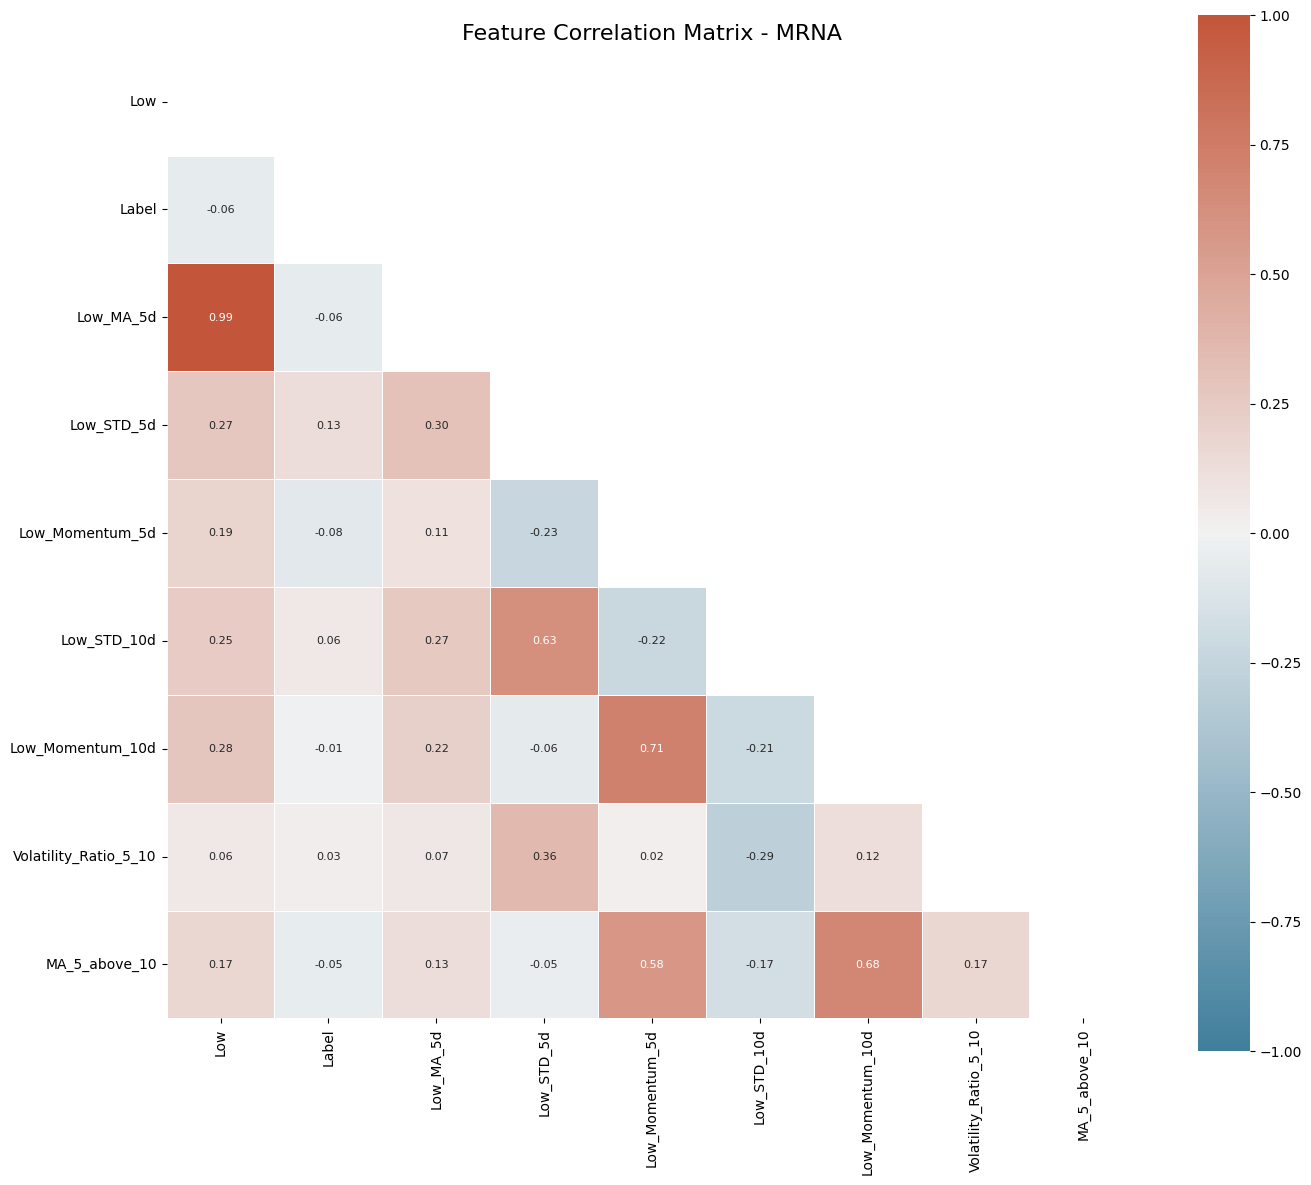

In [54]:
cleaned_stocks = delete_column_from_stocks(enhanced_stocks, "Low_Min_5d")
cleaned_stocks = delete_column_from_stocks(cleaned_stocks, "Low_Max_5d")
cleaned_stocks = delete_column_from_stocks(cleaned_stocks, "Low_Min_10d")
cleaned_stocks = delete_column_from_stocks(cleaned_stocks, "Low_Max_10d")
cleaned_stocks = delete_column_from_stocks(cleaned_stocks, "Low_MA_10d")
cleaned_stocks = delete_column_from_stocks(cleaned_stocks, "Low_Dist_MA_10d")
cleaned_stocks = delete_column_from_stocks(cleaned_stocks, "Low_Dist_MA_5d")
cleaned_stocks = delete_column_from_stocks(cleaned_stocks, "Open")


create_correlation_heatmap(cleaned_stocks, 'MRNA')

## **MERGE SUBDATAFRAMES & SAVE IT TO THE CSV**

In [55]:
import pandas as pd

def merge_stock_dataframes(stock_dict, include_stock_name=True, output_file="merged_stocks.csv"):
    """
    Merge multiple stock dataframes from a dictionary into a single dataframe
    and save to CSV.
    
    Parameters:
    ----------
    stock_dict : dict
        Dictionary where keys are stock names and values are dataframes
    include_stock_name : bool, default=True
        Whether to add a column with the stock name to identify each row's source
    output_file : str, default="merged_stocks.csv"
        Path to save the merged CSV file
    
    Returns:
    -------
    pandas.DataFrame
        The merged dataframe
    """
    # List to hold all dataframes
    all_dfs = []
    
    # Process each stock dataframe
    for stock_name, df in stock_dict.items():
        # Create a copy to avoid modifying the original
        temp_df = df.copy()
        
        # Add stock name as a column if requested
        if include_stock_name:
            temp_df['stock_name'] = stock_name
        
        # Add to our list
        all_dfs.append(temp_df)
    
    # Combine all dataframes
    merged_df = pd.concat(all_dfs, ignore_index=True)
    
    # Save to CSV
    merged_df.to_csv(output_file, index=False)
    
    print(f"Successfully merged {len(all_dfs)} stock dataframes with {merged_df.shape[0]} total rows")
    print(f"Saved to {output_file}")
    
    return merged_df

merged_stocks = merge_stock_dataframes(cleaned_stocks, output_file="all_stocks_data_without_stock_name.csv")

Successfully merged 36 stock dataframes with 17964 total rows
Saved to all_stocks_data_without_stock_name.csv


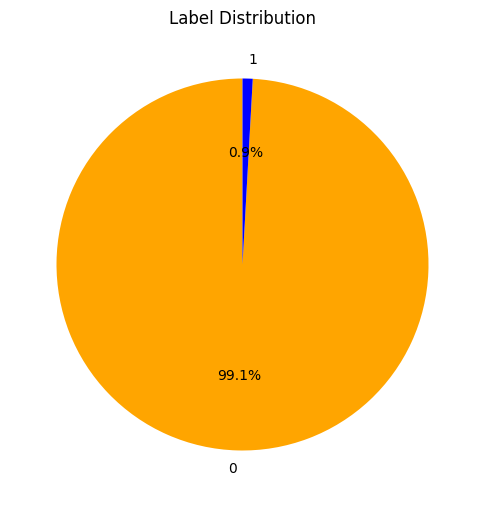

In [56]:
label_counts = merged_stocks['Label'].value_counts()

colors = [ 'orange','blue']
plt.figure(figsize=(6, 10))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Label Distribution')
plt.show()

## **SPLIT THE TEST DATA**

In [57]:
import pandas as pd
import numpy as np
from datetime import datetime

def split_and_save_timeseries(
    data,
    test_size=0.2,
    split_by='stock',
    date_column=None,
    test_output="test_data.csv",
    train_output=None
):
    """
    Split time series data into training and testing sets, and save the test set to CSV.
    
    Parameters:
    ----------
    data : pandas.DataFrame or str
        DataFrame to split or path to CSV file
    test_size : float, default=0.2
        Proportion of the data to include in the test split (0 to 1)
    split_by : str, default='stock'
        How to split the data:
        - 'stock': Split each stock individually (maintaining time series integrity)
        - 'time': Split by a specific cutoff date
        - 'global': Split all data using the last test_size portion
    date_column : str, default=None
        Column name containing date information (required if split_by='time')
    test_output : str, default="test_data.csv"
        Path to save the test data CSV file
    train_output : str, default=None
        Path to save the train data CSV file (if None, train data is not saved)
    
    Returns:
    -------
    tuple
        (train_df, test_df) - The training and testing dataframes
    """
    # Load data if a string path is provided
    if isinstance(data, str):
        data = pd.read_csv(data)
    
    # Make a copy of the input data
    df = data.copy()
    
    # Initialize empty dataframes for train and test sets
    train_dfs = []
    test_dfs = []
    
    if split_by == 'stock':
        # Check if stock_name column exists
        if 'stock_name' not in df.columns:
            raise ValueError("Data doesn't have a 'stock_name' column. Use split_by='global' instead.")
        
        # Get unique stock names
        stocks = df['stock_name'].unique()
        
        print(f"Splitting data for {len(stocks)} stocks...")
        
        # Split each stock's data individually
        for stock in stocks:
            stock_data = df[df['stock_name'] == stock].sort_index()
            split_idx = int(len(stock_data) * (1 - test_size))
            
            stock_train = stock_data.iloc[:split_idx]
            stock_test = stock_data.iloc[split_idx:]
            
            train_dfs.append(stock_train)
            test_dfs.append(stock_test)
            
            print(f"  Stock {stock}: {len(stock_train)} training samples, {len(stock_test)} testing samples")
    
    elif split_by == 'time':
        # Check if date column is provided
        if date_column is None or date_column not in df.columns:
            raise ValueError("Valid date_column must be provided for split_by='time'")
        
        # Convert date column to datetime if it's not already
        if not pd.api.types.is_datetime64_any_dtype(df[date_column]):
            df[date_column] = pd.to_datetime(df[date_column])
        
        # Sort by date
        df = df.sort_values(by=date_column)
        
        # Find the cutoff date
        dates = df[date_column].unique()
        cutoff_idx = int(len(dates) * (1 - test_size))
        cutoff_date = dates[cutoff_idx]
        
        # Split the data
        train_dfs = [df[df[date_column] < cutoff_date]]
        test_dfs = [df[df[date_column] >= cutoff_date]]
        
        print(f"Split data by date: cutoff at {cutoff_date}")
        print(f"  Training samples: {len(train_dfs[0])}, Testing samples: {len(test_dfs[0])}")
    
    else:  # split_by == 'global'
        # Global split using last test_size portion of data
        split_idx = int(len(df) * (1 - test_size))
        
        train_dfs = [df.iloc[:split_idx]]
        test_dfs = [df.iloc[split_idx:]]
        
        print(f"Global split: {len(train_dfs[0])} training samples, {len(test_dfs[0])} testing samples")
    
    # Combine all train and test dataframes
    train_df = pd.concat(train_dfs, ignore_index=True)
    test_df = pd.concat(test_dfs, ignore_index=True)
    
    # Save test data to CSV
    test_df.to_csv(test_output, index=False)
    print(f"Test data saved to {test_output}")
    
    # Save train data if requested
    if train_output:
        train_df.to_csv(train_output, index=False)
        print(f"Train data saved to {train_output}")
    
    return train_df, test_df


# 1. After merging stocks with the previous function:
train_data, test_data = split_and_save_timeseries(
    merged_stocks, 
    test_size=0.2,
    split_by='stock',  # Split each stock individually
    test_output="test_stocks.csv",
    train_output="train_stocks.csv"
)

# 2. Or directly from the saved CSV:
# train_data, test_data = split_and_save_timeseries(
#     "all_stocks_data.csv",
#     test_size=0.2,
#     split_by='stock',
#     test_output="test_stocks.csv"
# )

Splitting data for 36 stocks...
  Stock AAPL: 399 training samples, 100 testing samples
  Stock MSFT: 399 training samples, 100 testing samples
  Stock NVDA: 399 training samples, 100 testing samples
  Stock GOOGL: 399 training samples, 100 testing samples
  Stock JNJ: 399 training samples, 100 testing samples
  Stock PFE: 399 training samples, 100 testing samples
  Stock UNH: 399 training samples, 100 testing samples
  Stock MRNA: 399 training samples, 100 testing samples
  Stock JPM: 399 training samples, 100 testing samples
  Stock BAC: 399 training samples, 100 testing samples
  Stock GS: 399 training samples, 100 testing samples
  Stock V: 399 training samples, 100 testing samples
  Stock AMZN: 399 training samples, 100 testing samples
  Stock TSLA: 399 training samples, 100 testing samples
  Stock NKE: 399 training samples, 100 testing samples
  Stock MCD: 399 training samples, 100 testing samples
  Stock PG: 399 training samples, 100 testing samples
  Stock KO: 399 training samp

## **MODELS**

Data shape: (17964, 11)

Data types:
Date                      object
Low                      float64
Label                      int64
Low_MA_5d                float64
Low_STD_5d               float64
Low_Momentum_5d          float64
Low_STD_10d              float64
Low_Momentum_10d         float64
Volatility_Ratio_5_10    float64
MA_5_above_10              int64
stock_name                object
dtype: object

Missing values:
No missing values

Converting Date to datetime and extracting features...
Added date features: day_of_week, month, year

Dropping non-numeric columns: ['stock_name']
Data shape after dropping rows with missing labels: (17964, 13)

Class distribution:
Label
0    99.120463
1     0.879537
Name: proportion, dtype: float64
Number of positive cases (drops ≥ 5%): 158

Time series split: Using the last 20.0% of data as test set
Training set: 14371 samples
Test set: 3593 samples

==== Model Training with Cross-Validation ====

Training Logistic Regression...
Cross-Validat

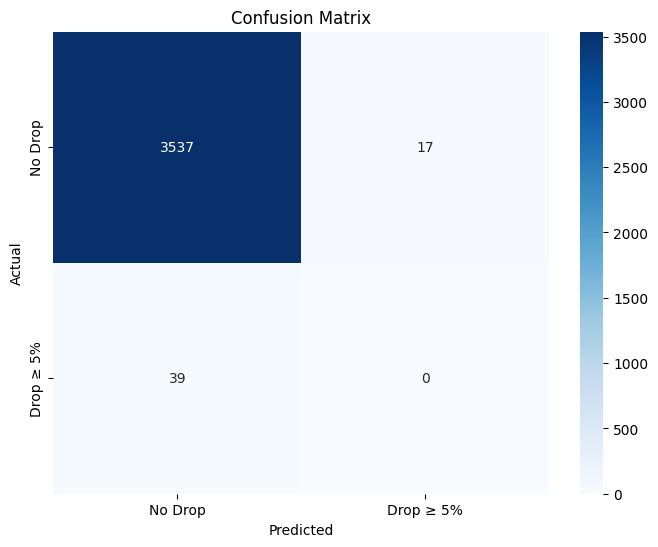


ROC AUC Score: 0.5590
Precision-Recall AUC: 0.0183


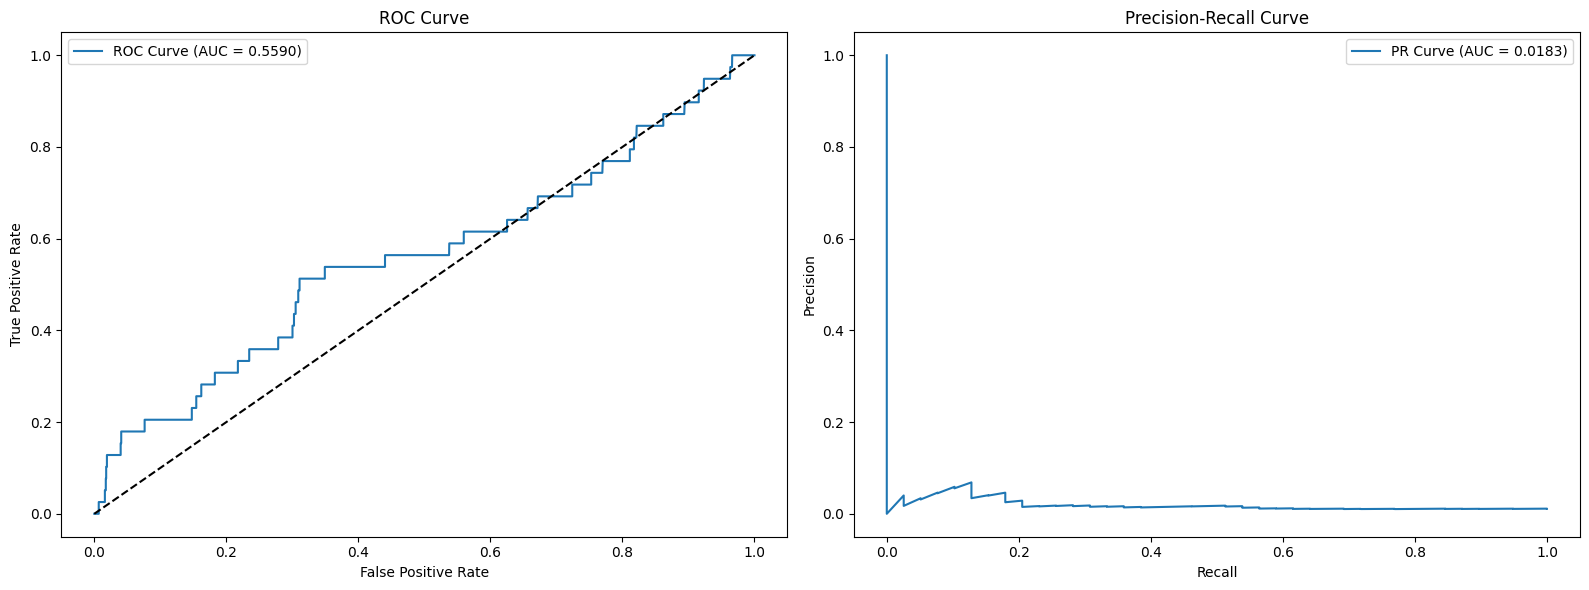


Optimal threshold based on F1 score: 0.0176
At this threshold - Precision: 0.0685, Recall: 0.1282

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3554
           1       0.07      0.13      0.09        39

    accuracy                           0.97      3593
   macro avg       0.53      0.55      0.54      3593
weighted avg       0.98      0.97      0.98      3593



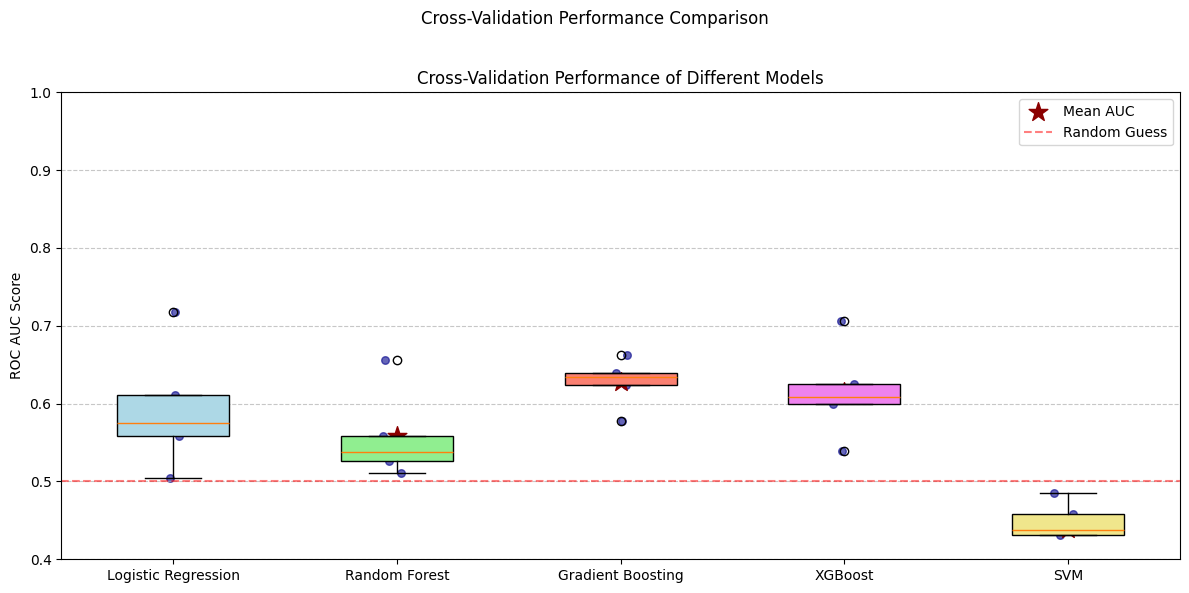

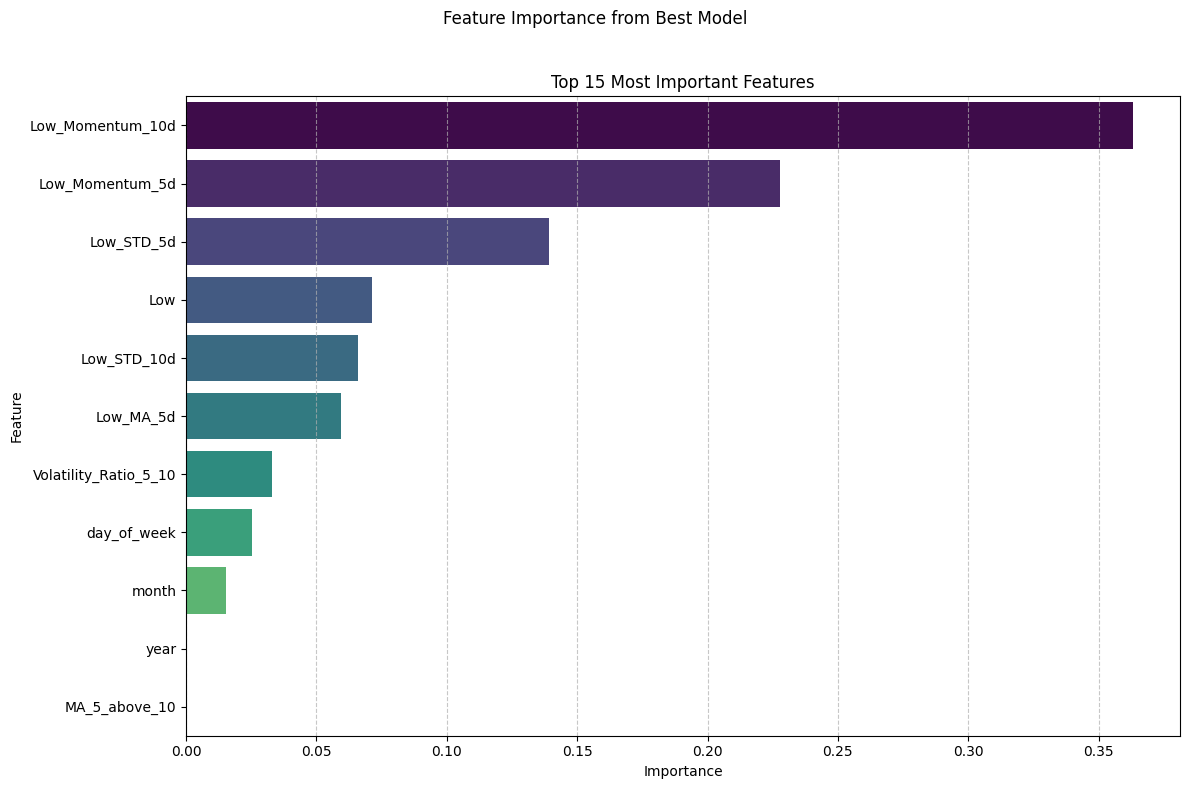

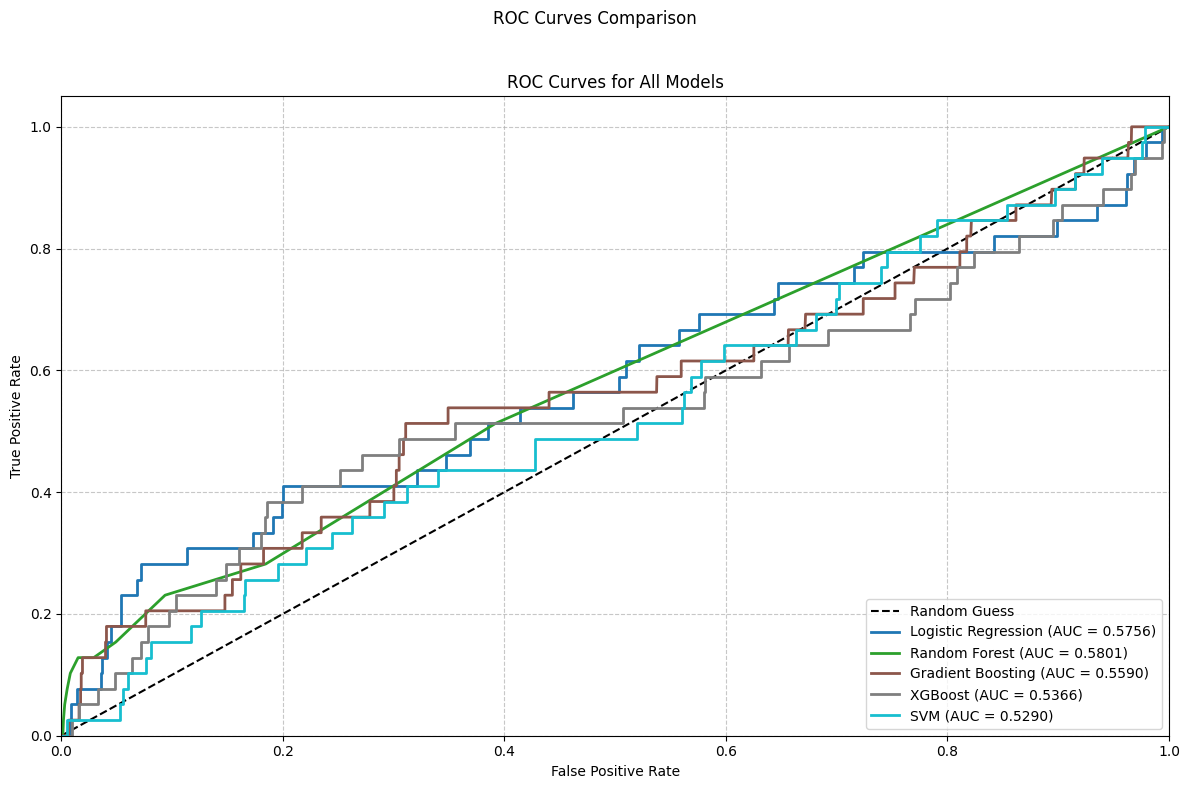

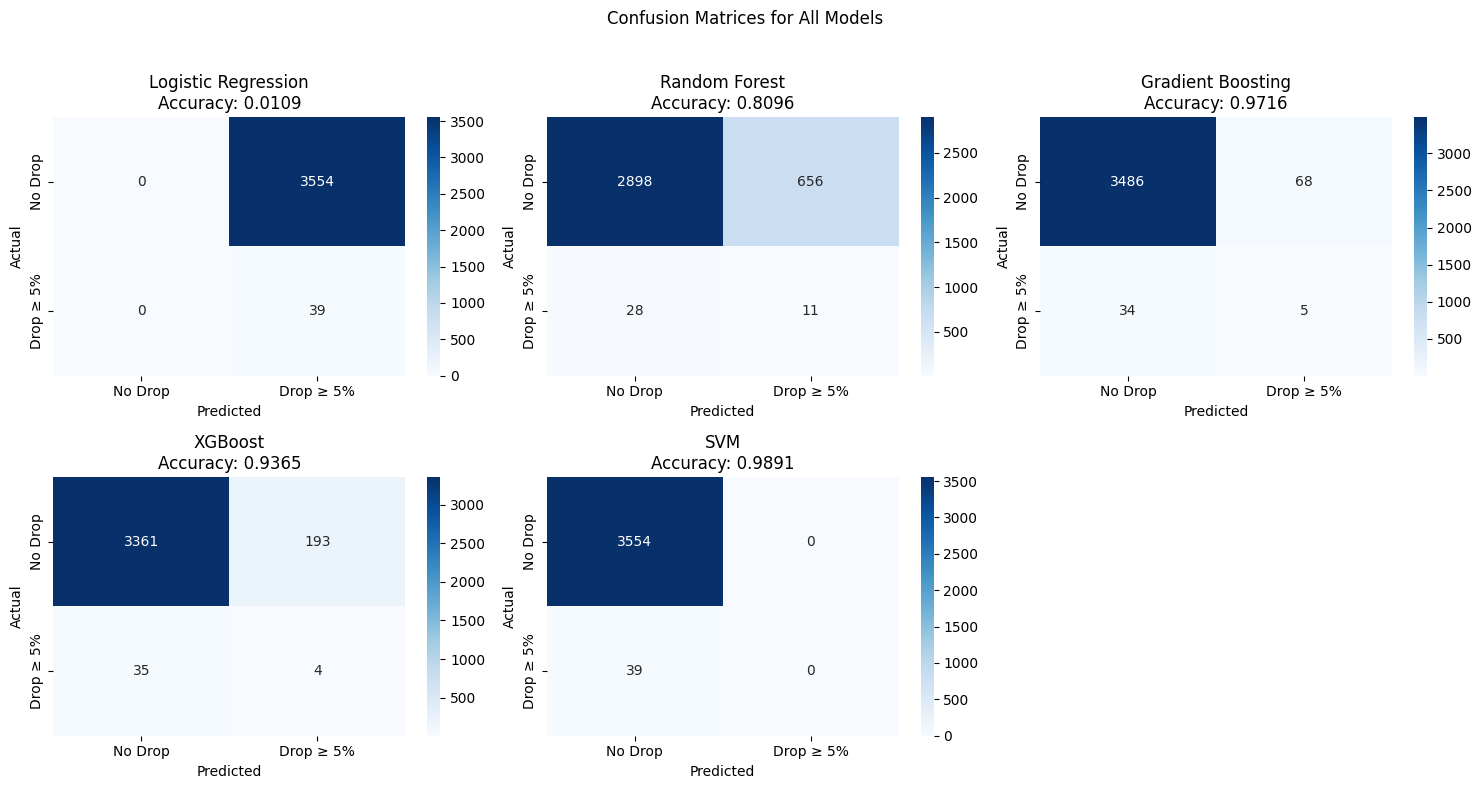

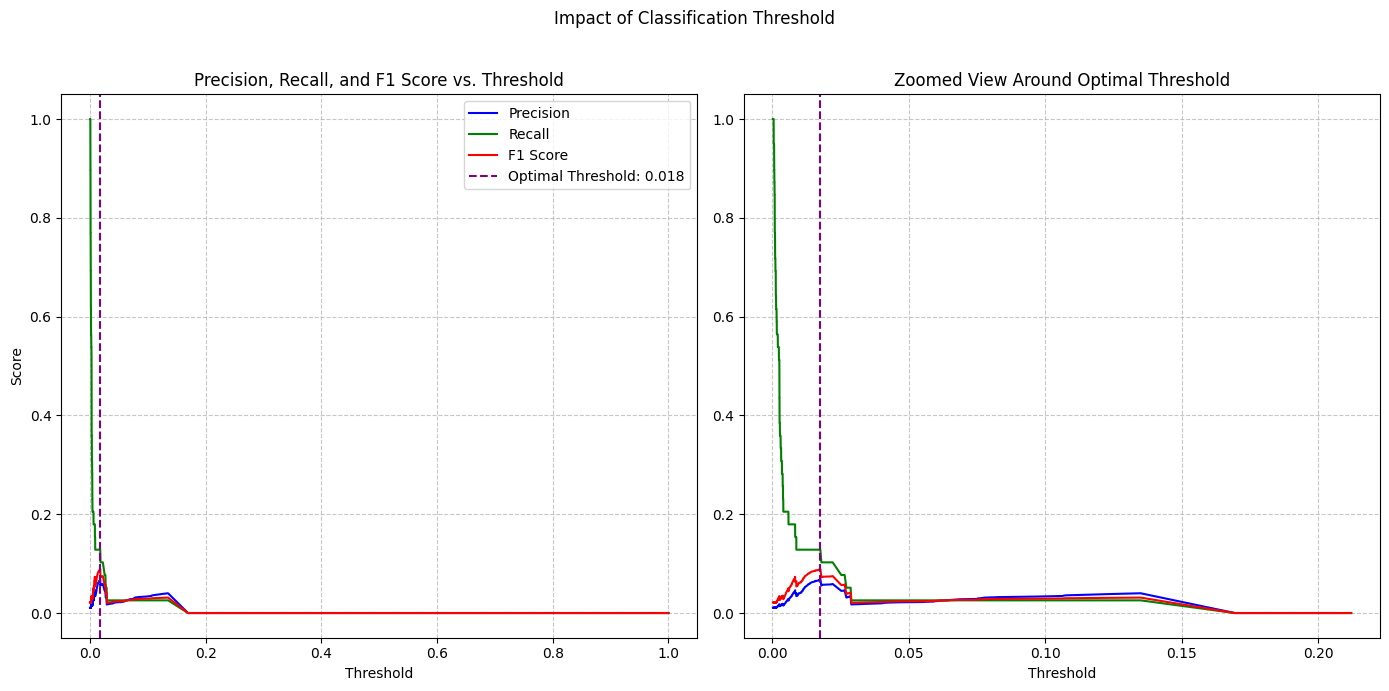

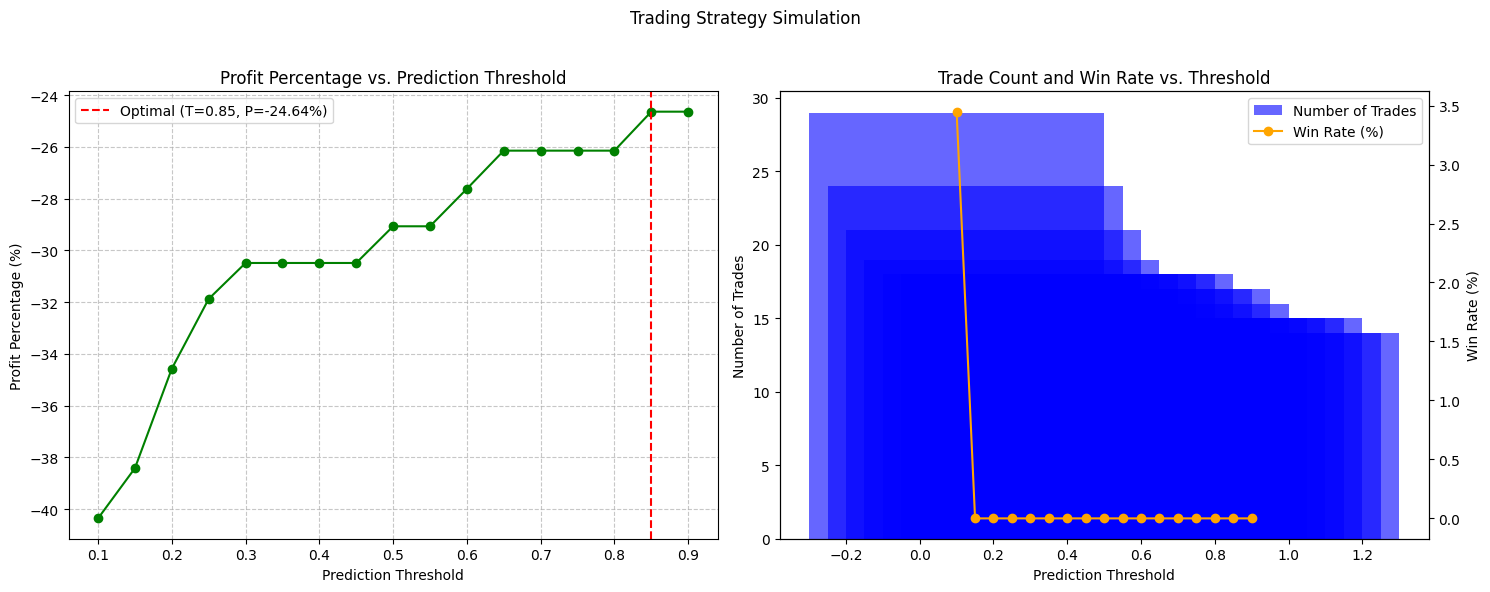

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

class MarketDropPredictor:
    def __init__(self, data_path=None, df=None):
        """
        Initialize the predictor with either a DataFrame or path to CSV file
        """
        if df is not None:
            self.df = df.copy()
        elif data_path is not None:
            self.df = pd.read_csv(data_path)
        else:
            raise ValueError("Either data_path or df must be provided")
            
        self.models = {}
        self.best_model = None
        self.feature_importance = None
        self.cv_results = {}
      
        
    def preprocess_data(self, date_column=None):
        """
        Preprocess the data, including handling date columns and shifting labels if requested
        
        Parameters:
        ----------
        date_column : str, default=None
            Name of the column containing dates. If provided, this column will be converted
            to datetime and relevant features will be extracted.
        """
        print("Data shape:", self.df.shape)
        print("\nData types:")
        print(self.df.dtypes)
        
        # Check for missing values
        missing_values = self.df.isnull().sum()
        print("\nMissing values:")
        print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values")
        
        # Handle date column if provided
        if date_column and date_column in self.df.columns:
            print(f"\nConverting {date_column} to datetime and extracting features...")
            
            # Convert to datetime
            self.df[date_column] = pd.to_datetime(self.df[date_column])
            
            # Extract useful features from date
            self.df['day_of_week'] = self.df[date_column].dt.dayofweek
            self.df['month'] = self.df[date_column].dt.month
            self.df['year'] = self.df[date_column].dt.year
            
            # Sort by date
            self.df = self.df.sort_values(by=date_column)
            
            print(f"Added date features: day_of_week, month, year")
        
        # Look for potential date columns that weren't specified
        for col in self.df.columns:
            # Skip if already identified as date
            if date_column and col == date_column:
                continue
                
            # Check if column contains string values that might be dates
            if self.df[col].dtype == 'object':
                sample_val = self.df[col].iloc[0] if not self.df[col].isna().all() else None
                if sample_val and isinstance(sample_val, str) and (
                    '-' in sample_val or '/' in sample_val):
                    print(f"\nWarning: Column '{col}' appears to contain dates but wasn't specified as date_column.")
                    print(f"Example value: {sample_val}")
                    print(f"This column will be dropped to prevent conversion errors.")
                    self.df = self.df.drop(col, axis=1)
        
        # Drop any remaining object columns that can't be used by the model
        object_columns = self.df.select_dtypes(include=['object']).columns.tolist()
        if object_columns:
            print("\nDropping non-numeric columns:", object_columns)
            self.df = self.df.drop(columns=object_columns)
        
        if 'Label' in self.df.columns:
            # Handle missing labels
            self.df.dropna(subset=['Label'], inplace=True)
            print(f"Data shape after dropping rows with missing labels: {self.df.shape}")

            # Class distribution
            print("\nClass distribution:")
            class_dist = self.df['Label'].value_counts(normalize=True) * 100
            print(class_dist)
            print(f"Number of positive cases (drops ≥ 5%): {self.df['Label'].sum()}")
        
        return self.df

    def split_data(self, test_size=0.2, time_series_split=True, date_column=None):
        """
        Split the data into training and test sets, with option for time series splitting
        
        Parameters:
        ----------
        test_size : float, default=0.2
            Proportion of data to use for testing
        time_series_split : bool, default=True
            Whether to use time series splitting (last portion) or random splitting
        date_column : str, default=None
            Name of date column for sorting before split (if not already sorted)
        """
        # Make sure to exclude the date column if it exists
        if date_column and date_column in self.df.columns:
            X = self.df.drop(['Label', date_column], axis=1)
        else:
            X = self.df.drop('Label', axis=1)
            
        y = self.df['Label']
        
        # If a date column is provided and we're doing time series split, ensure data is sorted
        if time_series_split and date_column and date_column in self.df.columns:
            sorted_indices = self.df.sort_values(by=date_column).index
            X = X.loc[sorted_indices]
            y = y.loc[sorted_indices]
        
        if time_series_split:
            # Use the last test_size portion of the data as test set
            split_idx = int(len(self.df) * (1 - test_size))
            X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
            y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
            print(f"\nTime series split: Using the last {test_size*100}% of data as test set")
        else:
            # Random split (not recommended for time series data)
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=42, stratify=y
            )
            print(f"\nRandom split: {test_size*100}% test size with stratification")
        
        print(f"Training set: {X_train.shape[0]} samples")
        print(f"Test set: {X_test.shape[0]} samples")
        
        # Check for datetime columns that might have been missed
        datetime_cols = X_train.select_dtypes(include=['datetime64']).columns.tolist()
        if datetime_cols:
            print(f"\nWarning: Found datetime columns in features: {datetime_cols}")
            print("These will be dropped to prevent errors in model training.")
            X_train = X_train.drop(columns=datetime_cols)
            X_test = X_test.drop(columns=datetime_cols)
            
        return X_train, X_test, y_train, y_test
    
    def train_models(self, X_train, y_train, cv=5):
        """
        Train multiple models and evaluate them with cross-validation
        """
        print("\n==== Model Training with Cross-Validation ====")
        
        # Double check for any remaining datetime columns
        datetime_cols = X_train.select_dtypes(include=['datetime64']).columns.tolist()
        if datetime_cols:
            print(f"Dropping datetime columns: {datetime_cols}")
            X_train = X_train.drop(columns=datetime_cols)
        
        # Define models to try
        models = {
            'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
            'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
            'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
            'XGBoost': XGBClassifier(n_estimators=100, scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]), random_state=42),
            'SVM': SVC(probability=True, class_weight='balanced', random_state=42)
        }
        
        # Create a pipeline with scaling for each model
        self.models = {name: Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ]) for name, model in models.items()}
        
        # Set up TimeSeriesSplit for cross-validation
        tscv = TimeSeriesSplit(n_splits=cv)
        
        # Ensure we're working with numeric data (convert any remaining problematic columns)
        X_train_numeric = X_train.copy()
        for col in X_train_numeric.columns:
            if X_train_numeric[col].dtype.name == 'object':
                try:
                    X_train_numeric[col] = pd.to_numeric(X_train_numeric[col])
                except (ValueError, TypeError):
                    print(f"Dropping non-numeric column '{col}'")
                    X_train_numeric = X_train_numeric.drop(columns=[col])
        
        # Train and evaluate each model
        cv_results = {}
        for name, pipeline in self.models.items():
            print(f"\nTraining {name}...")
            try:
                # Manual cross-validation to handle any remaining issues
                scores = []
                for train_idx, val_idx in tscv.split(X_train_numeric):
                    X_train_fold, X_val_fold = X_train_numeric.iloc[train_idx], X_train_numeric.iloc[val_idx]
                    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
                    
                    pipeline.fit(X_train_fold, y_train_fold)
                    y_val_pred_proba = pipeline.predict_proba(X_val_fold)[:, 1]
                    fold_roc_auc = roc_auc_score(y_val_fold, y_val_pred_proba)
                    scores.append(fold_roc_auc)
                
                scores = np.array(scores)
                cv_results[name] = scores
                print(f"Cross-Validation ROC-AUC: {scores.mean():.4f} ± {scores.std():.4f}")
                
                # Fit on the entire training set
                pipeline.fit(X_train_numeric, y_train)
                
            except Exception as e:
                print(f"Error training {name}: {e}")
                continue
        
        # Store the CV results
        self.cv_results = cv_results
        
        # Find the best model if we have results
        if cv_results:
            best_model_name = max(cv_results, key=lambda k: cv_results[k].mean())
            self.best_model = self.models[best_model_name]
            print(f"\nBest model based on cross-validation: {best_model_name}")
            
            # Store the optimal threshold
            self.optimal_threshold = 0.5  # Default value, to be updated in evaluate_best_model
            
            # Extract feature importance if available
            if hasattr(self.best_model['model'], 'feature_importances_'):
                self.feature_importance = pd.DataFrame({
                    'Feature': X_train_numeric.columns,
                    'Importance': self.best_model['model'].feature_importances_
                }).sort_values('Importance', ascending=False)
                print("\nFeature Importance:")
                print(self.feature_importance)
        else:
            print("No models were successfully trained. Please check your data.")
        
        return cv_results
    
    def evaluate_best_model(self, X_test, y_test, threshold=0.5):
        """
        Evaluate the best model on the test set
        """
        if self.best_model is None:
            print("No model to evaluate. Please train models first.")
            return None
        
        print("\n==== Best Model Evaluation on Test Set ====")
        
        # Ensure X_test has the same columns as what was used for training
        # Drop datetime columns
        datetime_cols = X_test.select_dtypes(include=['datetime64']).columns.tolist()
        if datetime_cols:
            X_test = X_test.drop(columns=datetime_cols)
            
        # Predictions
        y_pred_proba = self.best_model.predict_proba(X_test)[:, 1]
        y_pred = (y_pred_proba >= threshold).astype(int)
        
        # Calculate metrics
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['No Drop', 'Drop ≥ 5%'],
                    yticklabels=['No Drop', 'Drop ≥ 5%'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
        
        # ROC Curve
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"\nROC AUC Score: {roc_auc:.4f}")
        
        # Precision-Recall Curve
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)
        print(f"Precision-Recall AUC: {pr_auc:.4f}")
        
        # Plot ROC and PR curves
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Plot ROC curve
        from sklearn.metrics import roc_curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        ax1.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
        ax1.plot([0, 1], [0, 1], 'k--')
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.set_title('ROC Curve')
        ax1.legend()
        
        # Plot Precision-Recall curve
        ax2.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.4f})')
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.set_title('Precision-Recall Curve')
        ax2.legend()
        
        plt.tight_layout()
        plt.show()
        
        # Find optimal threshold based on F1 score
        f1_scores = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision, recall)]
        optimal_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
        self.optimal_threshold = optimal_threshold  # Store the optimal threshold
        
        print(f"\nOptimal threshold based on F1 score: {optimal_threshold:.4f}")
        print(f"At this threshold - Precision: {precision[optimal_idx]:.4f}, Recall: {recall[optimal_idx]:.4f}")
        
        # Recalculate predictions with optimal threshold
        y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
        print("\nClassification Report with Optimal Threshold:")
        print(classification_report(y_test, y_pred_optimal))
        
        return {
            'roc_auc': roc_auc,
            'pr_auc': pr_auc,
            'optimal_threshold': optimal_threshold
        }
    
    def predict_future_drops(self, new_data, threshold=None):
        """
        Predict drop probabilities for new data
        
        Parameters:
        new_data: DataFrame with same features as training data
        threshold: Probability threshold (if None, uses optimal threshold if available)
        
        Returns:
        DataFrame with original data and predictions added
        """
        if self.best_model is None:
            raise ValueError("Model not trained yet. Call train_models first.")
        
        # If no threshold specified, use optimal if available, otherwise default to 0.5
        if threshold is None:
            threshold = getattr(self, 'optimal_threshold', 0.5)
        
        # Prepare new_data - drop datetime columns
        new_data_prepared = new_data.copy()
        datetime_cols = new_data_prepared.select_dtypes(include=['datetime64']).columns.tolist()
        if datetime_cols:
            new_data_prepared = new_data_prepared.drop(columns=datetime_cols)
            
        # Make predictions
        results = new_data.copy()
        drop_proba = self.best_model.predict_proba(new_data_prepared)[:, 1]
        results['drop_probability'] = drop_proba
        results['predicted_drop'] = (drop_proba >= threshold).astype(int)
        
        return results


# Add visualization functions
def visualize_cv_results(cv_results):
    """
    Visualize cross-validation results across different models
    """
    plt.figure(figsize=(12, 6))
    
    # Prepare data for boxplot
    data = []
    labels = []
    for model_name, scores in cv_results.items():
        data.append(scores)
        labels.append(model_name)
    
    # Create boxplot
    box = plt.boxplot(data, patch_artist=True, labels=labels)
    
    # Color the boxes
    colors = ['lightblue', 'lightgreen', 'salmon', 'violet', 'khaki']
    for patch, color in zip(box['boxes'], colors[:len(data)]):
        patch.set_facecolor(color)
    
    # Add individual points
    for i, d in enumerate(data):
        x = np.random.normal(i+1, 0.04, size=len(d))
        plt.scatter(x, d, alpha=0.6, color='darkblue', s=30)
    
    # Add mean as a star
    means = [np.mean(d) for d in data]
    plt.scatter(range(1, len(means)+1), means, marker='*', s=200, color='darkred', label='Mean AUC')
    
    # Customize the plot
    plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Random Guess')
    plt.ylabel('ROC AUC Score')
    plt.title('Cross-Validation Performance of Different Models')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0.4, 1.0)  # Set y-axis limits
    plt.legend()
    plt.tight_layout()
    
    return plt.gcf()

def visualize_feature_importance(feature_importance_df, top_n=15):
    """
    Visualize feature importance
    """
    if feature_importance_df is None:
        print("No feature importance data available.")
        return None
        
    # Get top N features
    top_features = feature_importance_df.nlargest(top_n, 'Importance')
    
    plt.figure(figsize=(12, 8))
    colors = plt.cm.viridis(np.linspace(0, 0.9, len(top_features)))
    
    # Create horizontal bar plot
    sns.barplot(x='Importance', y='Feature', data=top_features, palette=colors)
    
    plt.title(f'Top {top_n} Most Important Features')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    return plt.gcf()

def visualize_roc_curves_for_all_models(models, X_test, y_test):
    """
    Plot ROC curves for all trained models on the test set
    """
    plt.figure(figsize=(12, 8))
    
    # Plot random guess line
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    
    # Plot ROC curve for each model
    colors = plt.cm.tab10(np.linspace(0, 1, len(models)))
    
    for i, (name, model) in enumerate(models.items()):
        try:
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            
            plt.plot(fpr, tpr, color=colors[i], lw=2, 
                     label=f'{name} (AUC = {roc_auc:.4f})')
        except Exception as e:
            print(f"Error plotting ROC curve for {name}: {e}")
    
    # Customize the plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for All Models')
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    
    return plt.gcf()

def visualize_threshold_impact(y_test, y_pred_proba):
    """
    Visualize the impact of different threshold values on precision, recall, and F1 score
    """
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    
    # Calculate F1 scores for each threshold
    f1_scores = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision, recall)]
    
    # Find optimal threshold based on F1 score
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 1.0
    
    # Create threshold vs metrics plot
    plt.figure(figsize=(14, 7))
    
    # Plot precision and recall against thresholds
    plt.subplot(1, 2, 1)
    plt.plot(thresholds, precision[:-1], 'b-', label='Precision')
    plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
    
    # Calculate and plot F1 scores against thresholds
    plt.plot(thresholds, f1_scores[:-1], 'r-', label='F1 Score')
    
    # Mark the optimal threshold
    plt.axvline(x=optimal_threshold, color='purple', linestyle='--', 
                label=f'Optimal Threshold: {optimal_threshold:.3f}')
    
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Precision, Recall, and F1 Score vs. Threshold')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Plot zoomed version around optimal threshold
    plt.subplot(1, 2, 2)
    zoom_min = max(0, optimal_threshold - 0.2)
    zoom_max = min(1, optimal_threshold + 0.2)
    
    # Filter data for the zoom region
    zoom_indices = np.where((thresholds >= zoom_min) & (thresholds <= zoom_max))
    if len(zoom_indices[0]) > 0:
        zoom_thresholds = thresholds[zoom_indices]
        zoom_precision = precision[:-1][zoom_indices]
        zoom_recall = recall[:-1][zoom_indices]
        zoom_f1 = [f1_scores[:-1][i] for i in zoom_indices[0]]
        
        plt.plot(zoom_thresholds, zoom_precision, 'b-', label='Precision')
        plt.plot(zoom_thresholds, zoom_recall, 'g-', label='Recall')
        plt.plot(zoom_thresholds, zoom_f1, 'r-', label='F1 Score')
        plt.axvline(x=optimal_threshold, color='purple', linestyle='--',
                    label=f'Optimal: {optimal_threshold:.3f}')
    
    plt.xlabel('Threshold')
    plt.title('Zoomed View Around Optimal Threshold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    return plt.gcf()

def visualize_confusion_matrices(y_test, models, X_test, optimal_threshold=None):
    """
    Plot confusion matrices for all models
    """
    # Check if we have at least one model
    if not models:
        print("No models available to visualize.")
        return None
        
    # Determine number of rows and columns for subplot grid
    n_models = len(models)
    n_cols = min(3, n_models)
    n_rows = (n_models + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    
    # Handle case with just one model
    if n_models == 1:
        axes = np.array([axes])
    
    # Make all axes flat for easier indexing
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]
    
    i = 0
    for name, model in models.items():
        try:
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            threshold = optimal_threshold if optimal_threshold is not None else 0.5
            y_pred = (y_pred_proba >= threshold).astype(int)
            
            cm = confusion_matrix(y_test, y_pred)
            
            # Confusion matrix
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                      xticklabels=['No Drop', 'Drop ≥ 5%'],
                      yticklabels=['No Drop', 'Drop ≥ 5%'],
                      ax=axes[i])
            
            accuracy = np.sum(np.diag(cm)) / np.sum(cm)
            axes[i].set_title(f'{name}\nAccuracy: {accuracy:.4f}')
            axes[i].set_xlabel('Predicted')
            axes[i].set_ylabel('Actual')
            i += 1
        except Exception as e:
            print(f"Error creating confusion matrix for {name}: {e}")
    
    # Hide unused subplots
    for j in range(i, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    return fig

def create_profit_simulation(y_test, y_pred_proba, thresholds, initial_capital=10000):
    """
    Simulate trading strategy based on different prediction thresholds
    """
    results = []
    
    for threshold in thresholds:
        # Convert probabilities to predictions based on threshold
        y_pred = (y_pred_proba >= threshold).astype(int)
        
        # Simulate strategy
        capital = initial_capital
        n_trades = 0
        win_trades = 0
        
        for actual, pred in zip(y_test, y_pred):
            if pred == 1:  # Model predicts a drop
                n_trades += 1
                if actual == 1:  # Actual drop occurred
                    # Profit from shorting (simplified assumption: 5% gain)
                    capital *= 1.05
                    win_trades += 1
                else:  # No drop occurred
                    # Loss from incorrect prediction (simplified: 2% loss)
                    capital *= 0.98
            
        # Calculate metrics
        win_rate = win_trades / n_trades if n_trades > 0 else 0
        profit_percent = ((capital - initial_capital) / initial_capital) * 100
        
        results.append({
            'threshold': threshold,
            'final_capital': capital,
            'n_trades': n_trades,
            'win_rate': win_rate,
            'profit_percent': profit_percent
        })
    
    return pd.DataFrame(results)

def visualize_profit_simulation(profit_simulation):
    """
    Visualize profits from different trading thresholds
    """
    if profit_simulation is None or profit_simulation.empty:
        print("No profit simulation data available.")
        return None
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot profit percentage against threshold
    ax1.plot(profit_simulation['threshold'], profit_simulation['profit_percent'], 
            marker='o', linestyle='-', color='green')
    ax1.set_xlabel('Prediction Threshold')
    ax1.set_ylabel('Profit Percentage (%)')
    ax1.set_title('Profit Percentage vs. Prediction Threshold')
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Find optimal threshold for maximum profit
    if not profit_simulation.empty:
        optimal_idx = profit_simulation['profit_percent'].idxmax()
        optimal_threshold = profit_simulation.loc[optimal_idx, 'threshold']
        max_profit = profit_simulation.loc[optimal_idx, 'profit_percent']
        
        ax1.axvline(x=optimal_threshold, color='red', linestyle='--',
                   label=f'Optimal (T={optimal_threshold:.2f}, P={max_profit:.2f}%)')
        ax1.legend()
    
    # Plot number of trades and win rate
    ax2.bar(profit_simulation['threshold'], profit_simulation['n_trades'], 
           color='blue', alpha=0.6, label='Number of Trades')
    ax2.set_xlabel('Prediction Threshold')
    ax2.set_ylabel('Number of Trades')
    ax2.set_title('Trade Count and Win Rate vs. Threshold')
    
    # Add win rate line on secondary y-axis
    ax3 = ax2.twinx()
    ax3.plot(profit_simulation['threshold'], profit_simulation['win_rate'] * 100, 
            marker='o', linestyle='-', color='orange', label='Win Rate (%)')
    ax3.set_ylabel('Win Rate (%)')
    
    # Combine legends
    lines1, labels1 = ax2.get_legend_handles_labels()
    lines2, labels2 = ax3.get_legend_handles_labels()
    ax3.legend(lines1 + lines2, labels1 + labels2, loc='best')
    
    plt.tight_layout()
    return fig

def add_visualizations(predictor, X_train, y_train, X_test, y_test):
    """
    Generate and display all visualizations for model evaluation
    """
    # 1. Visualize cross-validation results
    cv_fig = visualize_cv_results(predictor.cv_results)
    cv_fig.suptitle('Cross-Validation Performance Comparison')
    cv_fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    # 2. Visualize feature importance if available
    if predictor.feature_importance is not None:
        fi_fig = visualize_feature_importance(predictor.feature_importance)
        fi_fig.suptitle('Feature Importance from Best Model')
        fi_fig.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    
    # 3. Visualize ROC curves for all models
    # First, ensure X_test has no datetime columns
    X_test_prepared = X_test.copy()
    datetime_cols = X_test_prepared.select_dtypes(include=['datetime64']).columns.tolist()
    if datetime_cols:
        X_test_prepared = X_test_prepared.drop(columns=datetime_cols)
        
    roc_fig = visualize_roc_curves_for_all_models(predictor.models, X_test_prepared, y_test)
    roc_fig.suptitle('ROC Curves Comparison')
    roc_fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    # 4. Visualize confusion matrices for all models
    optimal_threshold = getattr(predictor, 'optimal_threshold', 0.5)
    cm_fig = visualize_confusion_matrices(y_test, predictor.models, X_test_prepared, optimal_threshold)
    if cm_fig:
        cm_fig.suptitle('Confusion Matrices for All Models')
        cm_fig.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    
    # 5. Visualize threshold impact on precision, recall, F1
    if predictor.best_model is not None:
        y_pred_proba = predictor.best_model.predict_proba(X_test_prepared)[:, 1]
        threshold_fig = visualize_threshold_impact(y_test, y_pred_proba)
        threshold_fig.suptitle('Impact of Classification Threshold')
        threshold_fig.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
        
        # 6. Profit simulation
        thresholds = np.linspace(0.1, 0.9, 17)
        profit_sim = create_profit_simulation(y_test, y_pred_proba, thresholds)
        profit_fig = visualize_profit_simulation(profit_sim)
        profit_fig.suptitle('Trading Strategy Simulation')
        profit_fig.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

# Example usage (add this to the end of your script)
data_path = r"C:\Users\elifr\OneDrive\Desktop\PROJECTS\Proje443\all_stocks_data.csv"
predictor = MarketDropPredictor(data_path=data_path)
df = predictor.preprocess_data(date_column='Date')
X_train, X_test, y_train, y_test = predictor.split_data(test_size=0.2, time_series_split=True, date_column='Date')
cv_results = predictor.train_models(X_train, y_train, cv=5)
eval_results = predictor.evaluate_best_model(X_test, y_test)

# Add visualizations
add_visualizations(predictor, X_train, y_train, X_test, y_test)